<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc" style="margin-top: 1em;"><ul class="toc-item"><li><span><a href="#feature-distribution" data-toc-modified-id="feature-distribution-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>feature distribution</a></span><ul class="toc-item"><li><span><a href="#No-scaling,-No-oversample" data-toc-modified-id="No-scaling,-No-oversample-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>No scaling, No oversample</a></span></li><li><span><a href="#Yes-scaling,-No-oversample" data-toc-modified-id="Yes-scaling,-No-oversample-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Yes scaling, No oversample</a></span></li><li><span><a href="#No-scaling,-Yes-oversample" data-toc-modified-id="No-scaling,-Yes-oversample-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>No scaling, Yes oversample</a></span></li><li><span><a href="#Yes-scaling,-Yes-oversample" data-toc-modified-id="Yes-scaling,-Yes-oversample-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Yes scaling, Yes oversample</a></span></li></ul></li><li><span><a href="#feature-scatter" data-toc-modified-id="feature-scatter-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>feature scatter</a></span><ul class="toc-item"><li><span><a href="#before-oversample" data-toc-modified-id="before-oversample-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>before oversample</a></span></li><li><span><a href="#after-oversample" data-toc-modified-id="after-oversample-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>after oversample</a></span></li></ul></li></ul></div>

In [1]:
import taiko as tk
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE, ADASYN
from sklearn.decomposition import PCA
from collections import Counter
import re

DRUMMERS = 8
SONGS = 4
ORDERS = [3, 3, 3, 4]

Using TensorFlow backend.


In [2]:
sns.set(font_scale=1.5)
WHO = 7
SONG = 1
ORDER = 3

# feature distribution

In [3]:
def plot_distribution(df):
    for keyword in tk.KEYWORD_COLS:
        columns = [col for col in df.columns if re.match('^\w*_' + keyword + '\w*$', col)]
        crop_df = df[['hit_type'] + columns]
        melt_df = crop_df.melt(id_vars='hit_type', var_name='feature')

        sns.catplot(y='value', x='feature', kind='boxen', hue='hit_type', data=melt_df, height=8, aspect=2)
        plt.xticks(rotation='vertical')
        plt.show()

## No scaling, No oversample

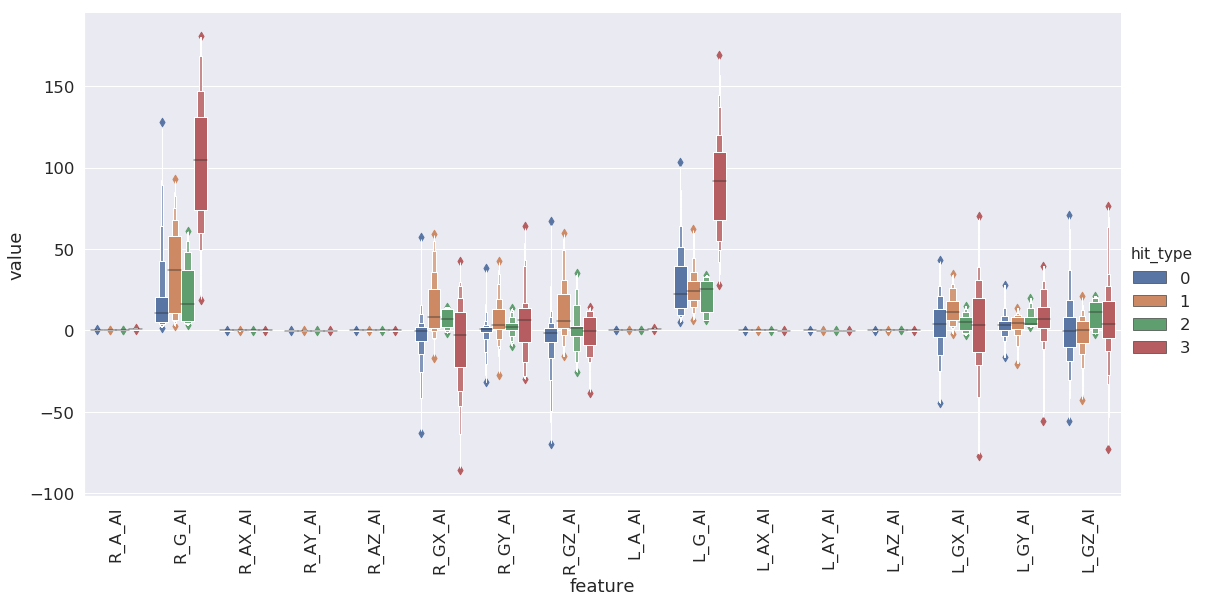

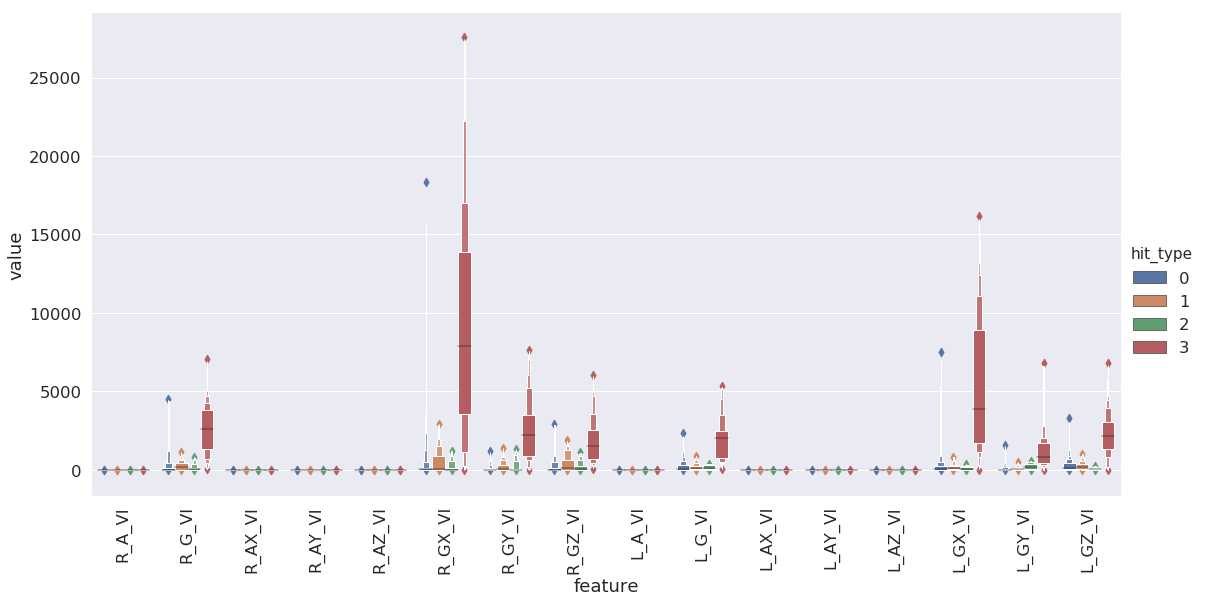

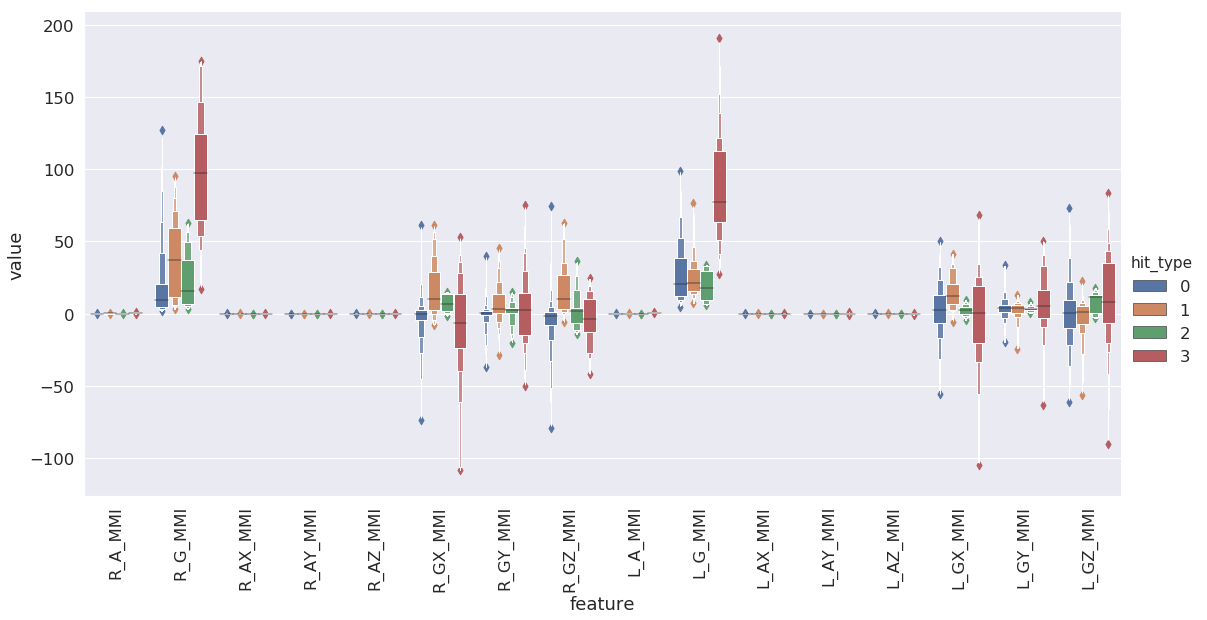

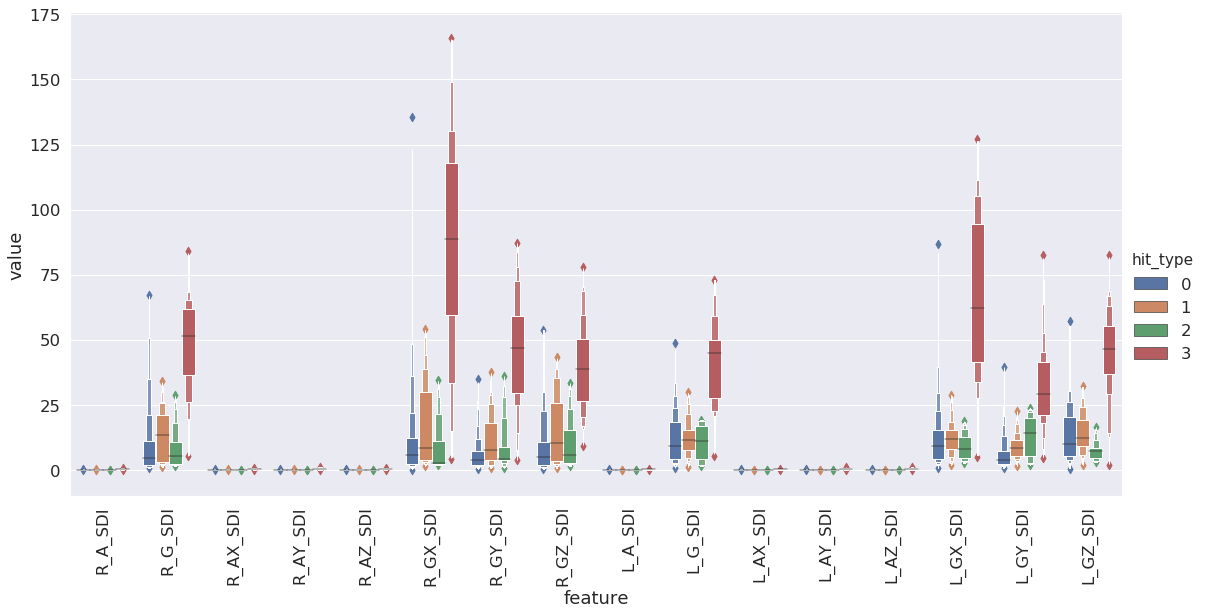

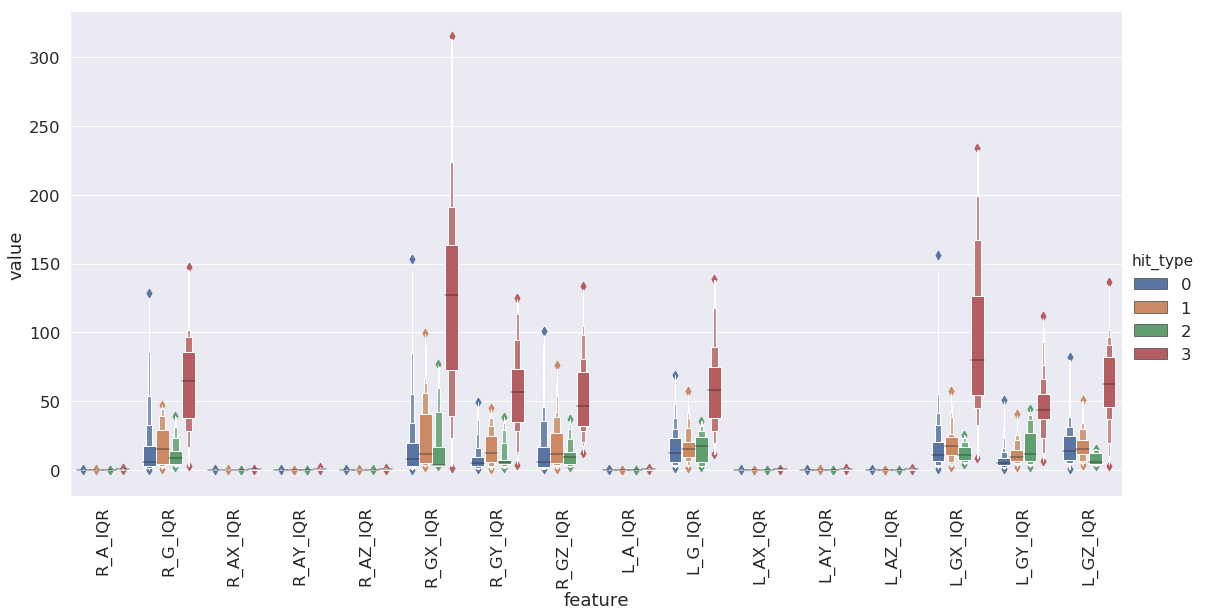

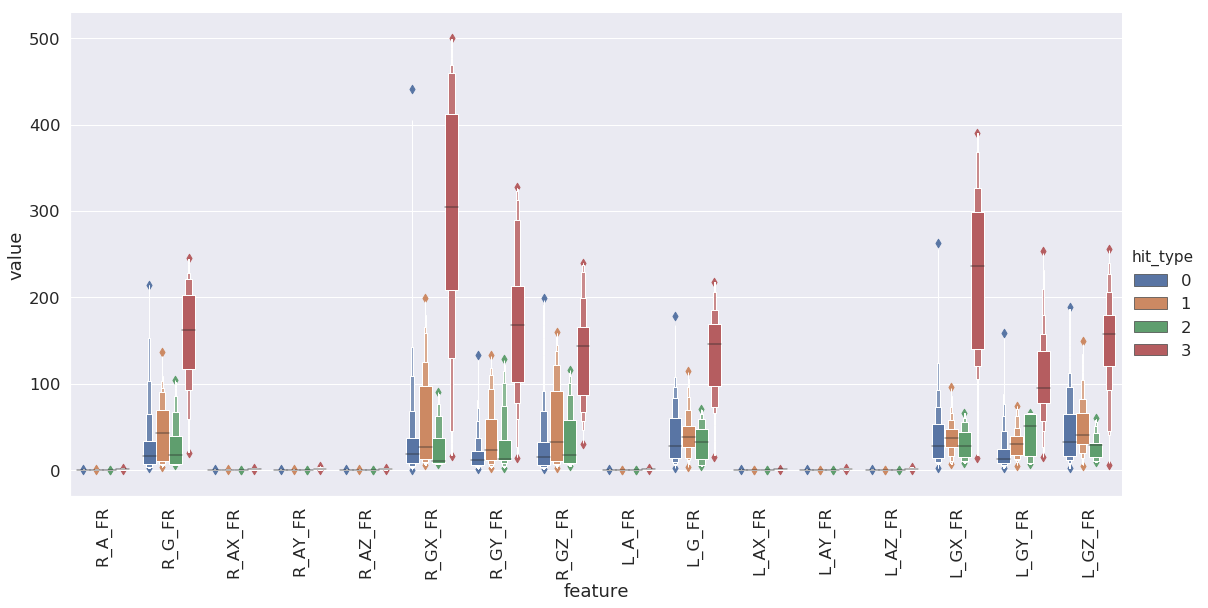

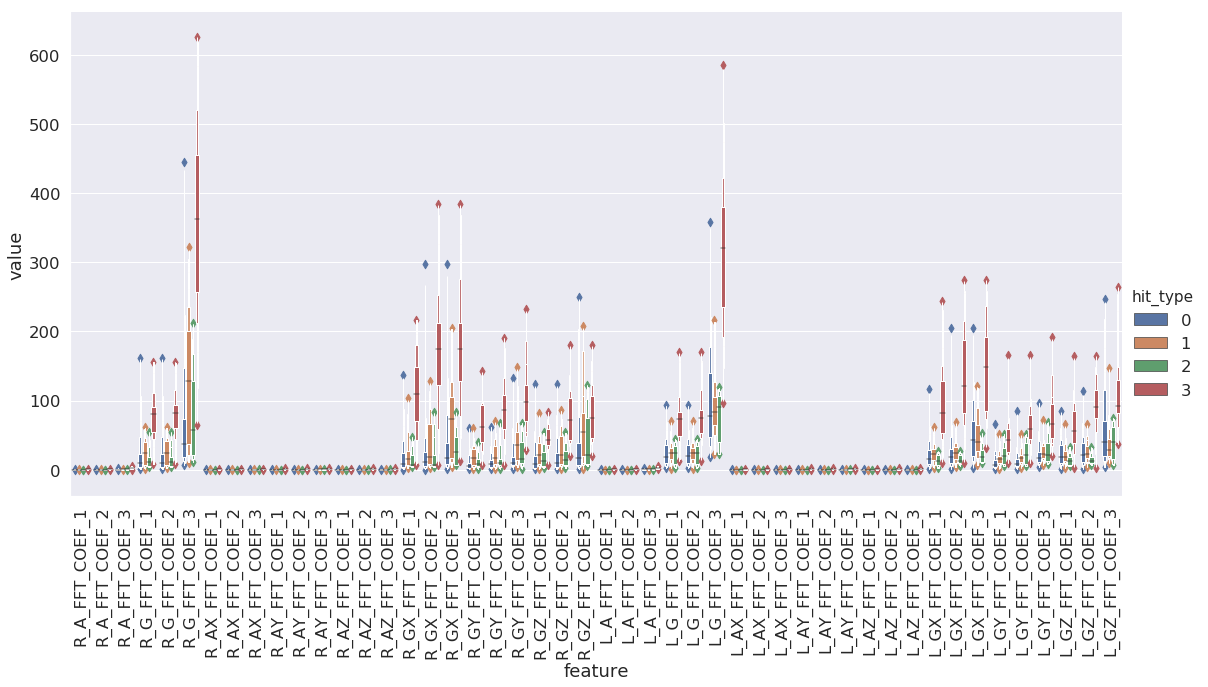

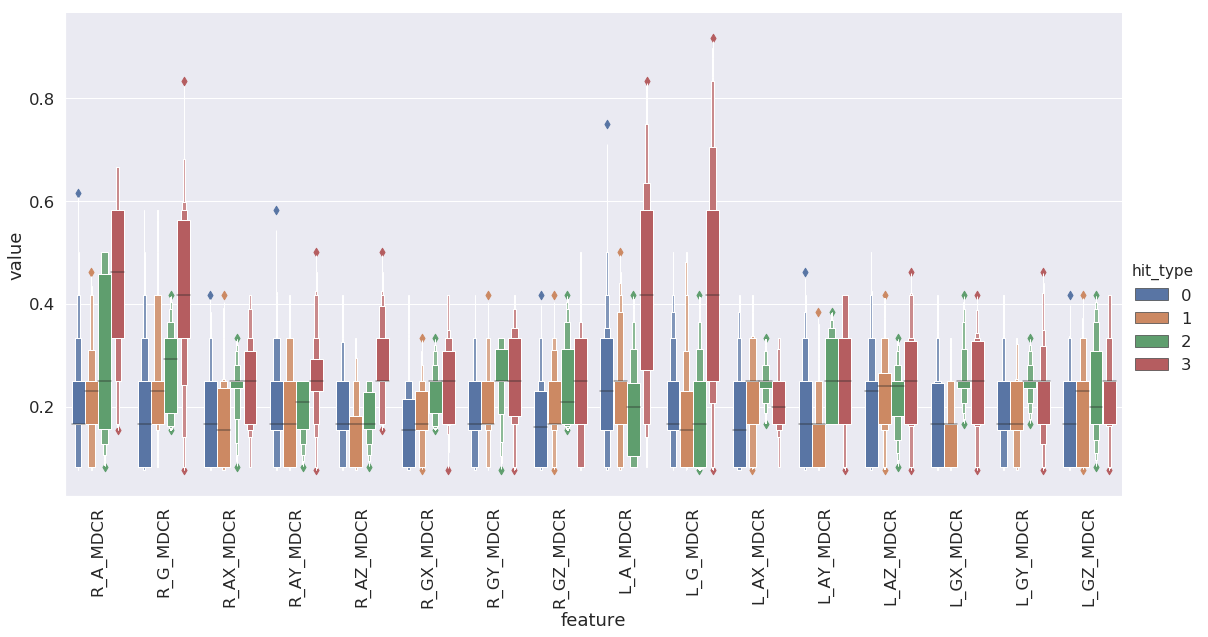

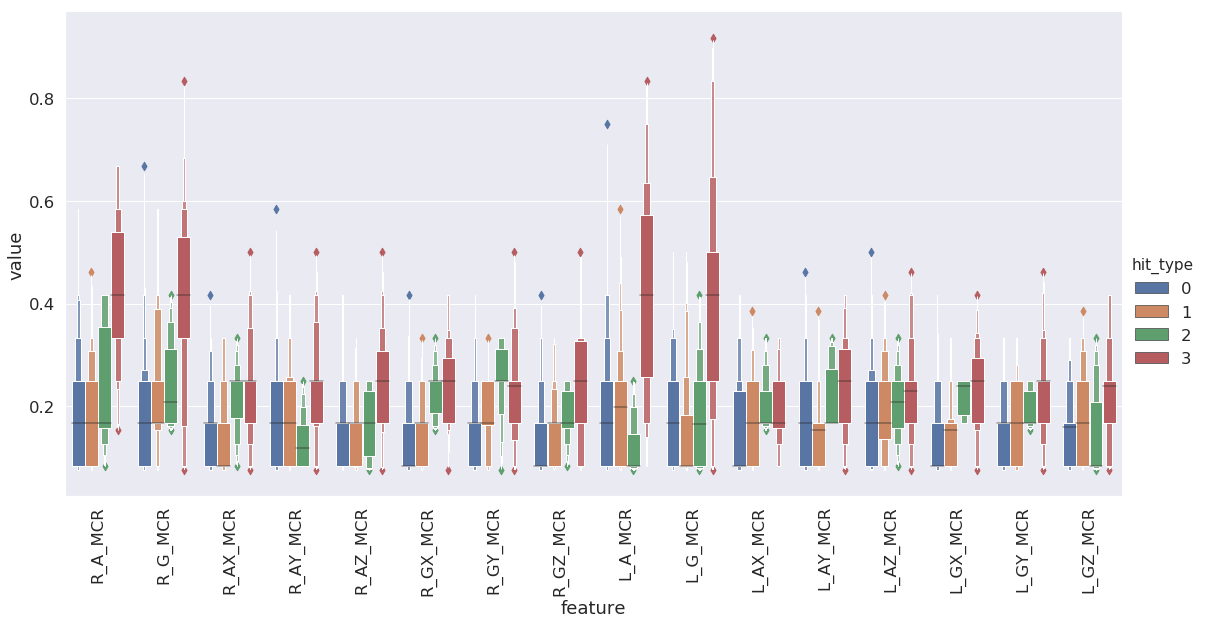

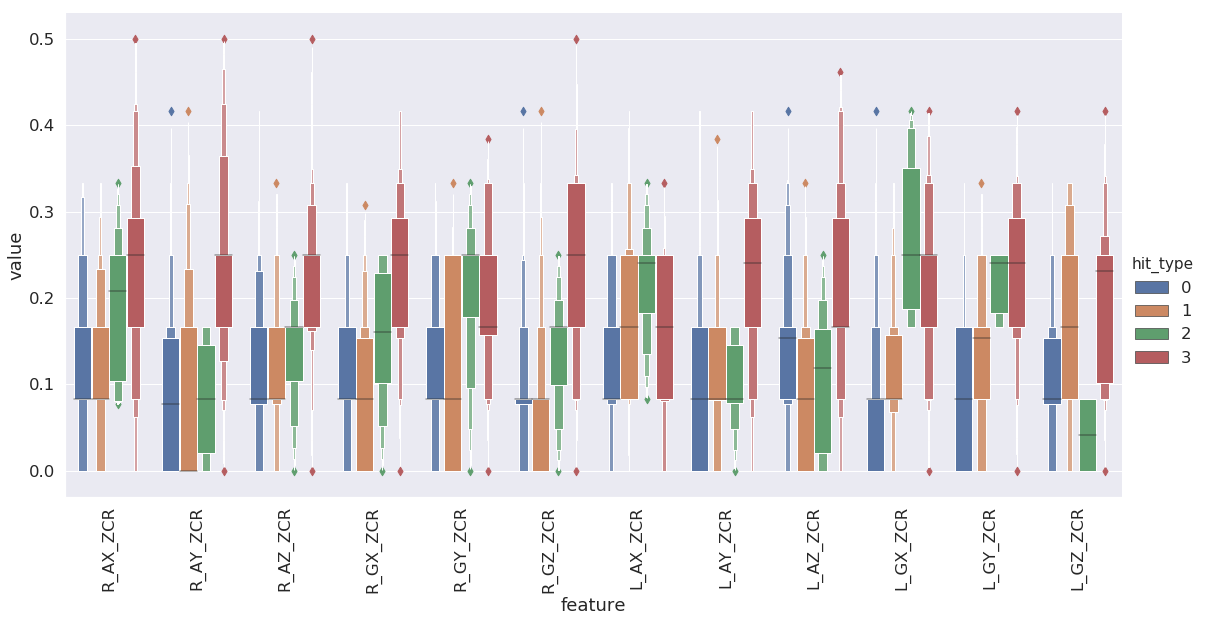

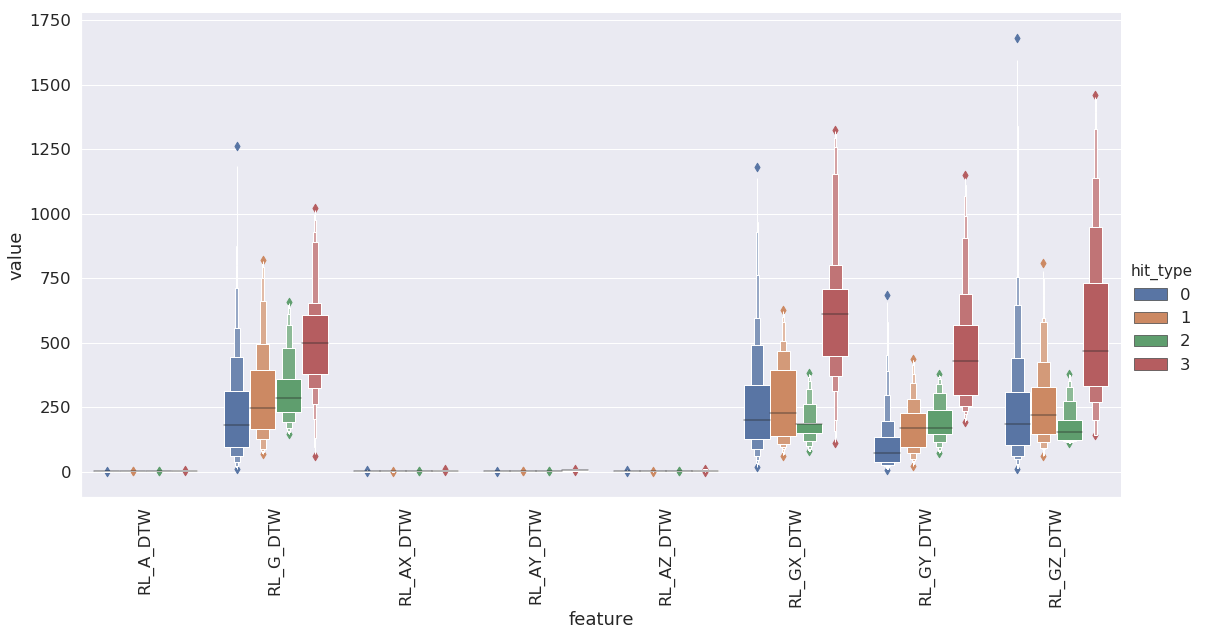

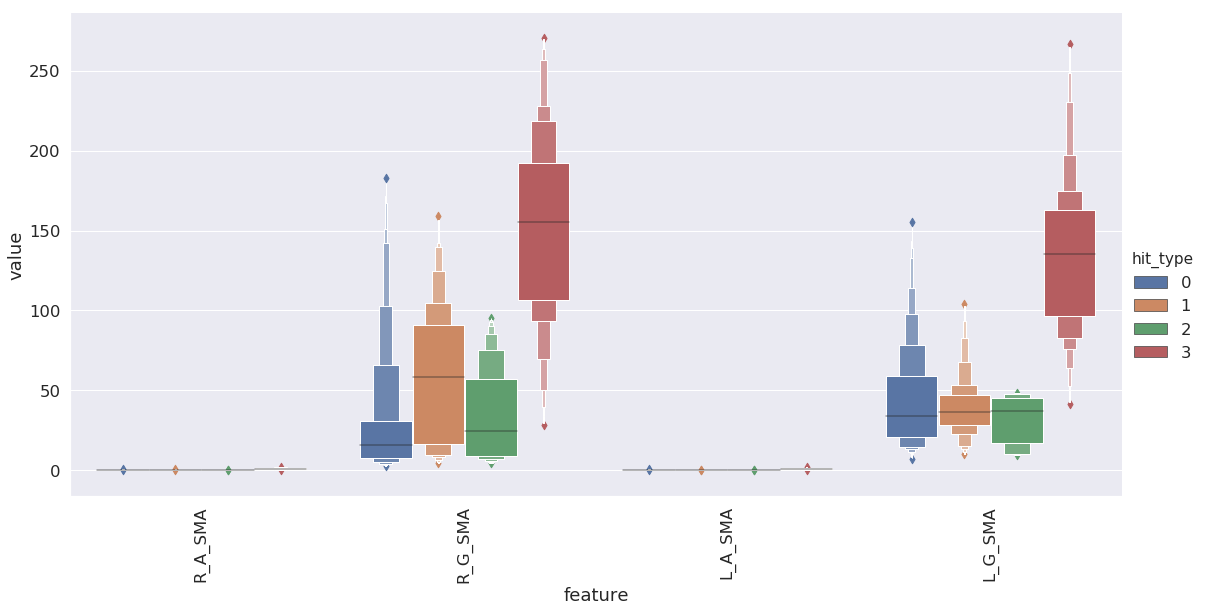

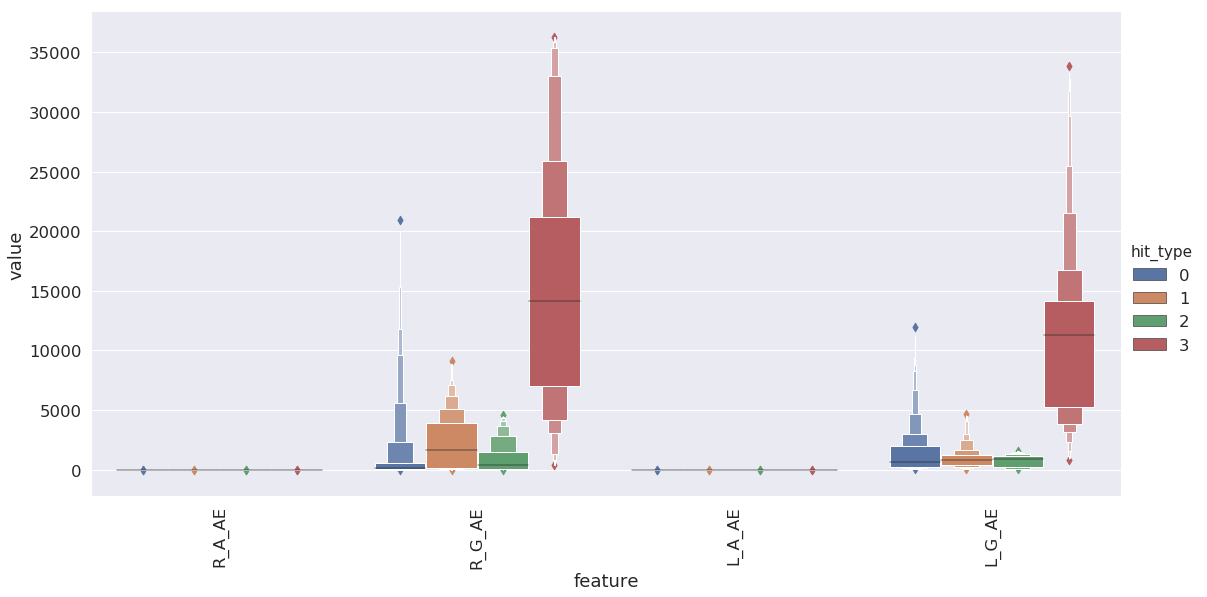

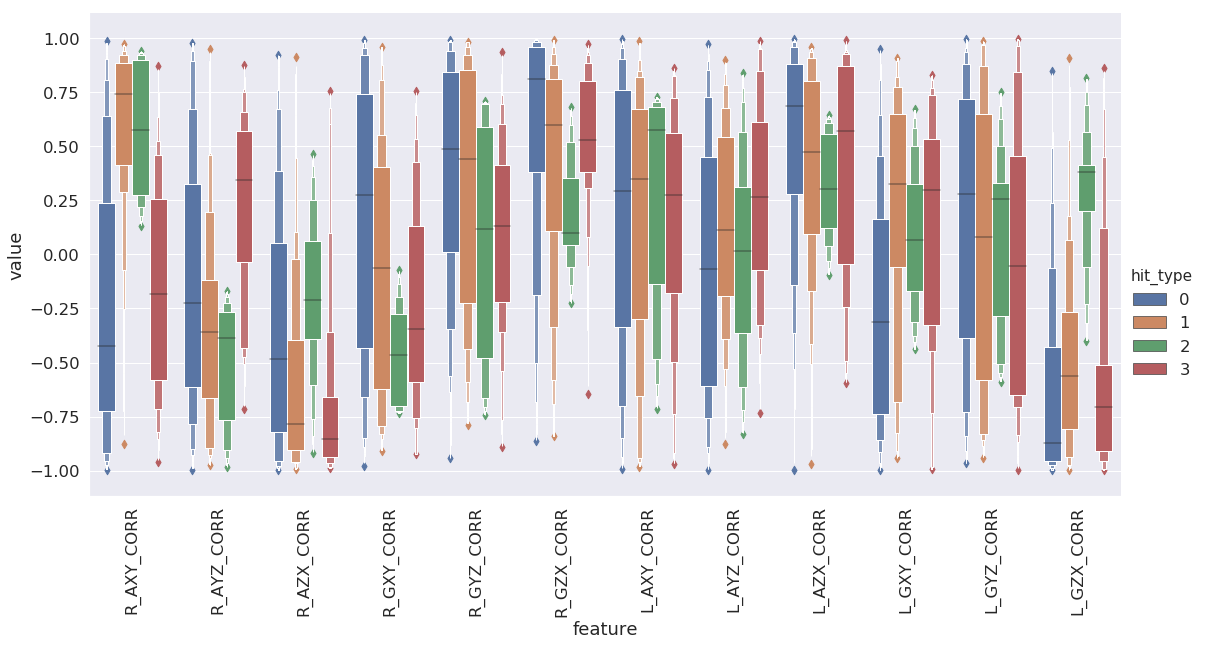

In [4]:
df = tk.get_event_primitive_df(WHO, SONG, ORDER, scaling=False, label_group='dong_ka')
plot_distribution(df)

## Yes scaling, No oversample

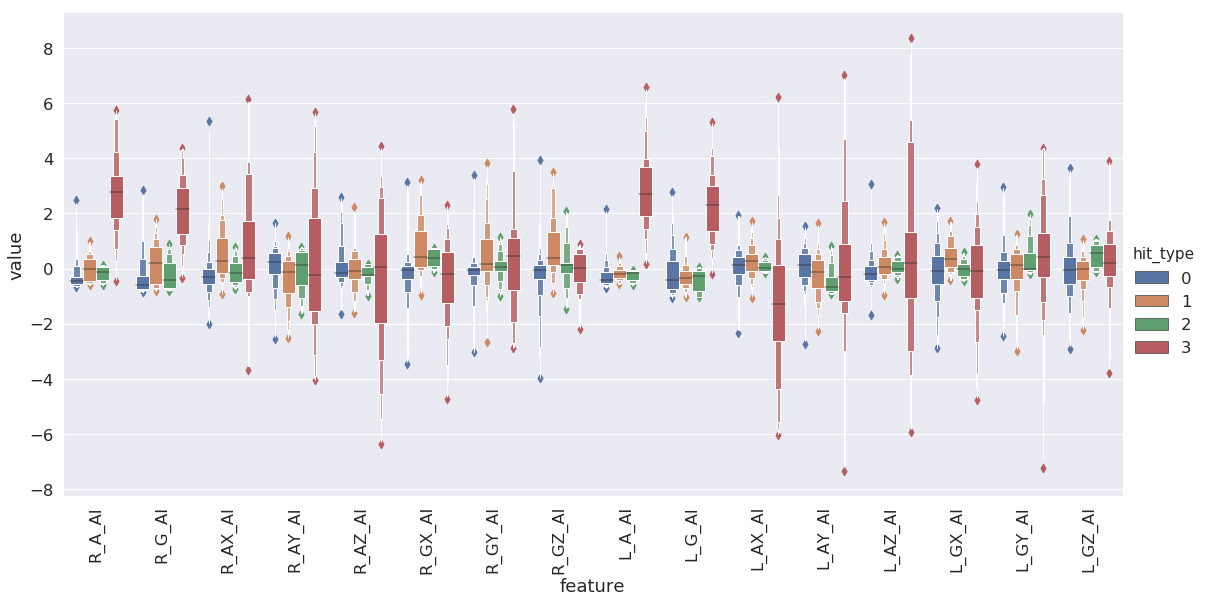

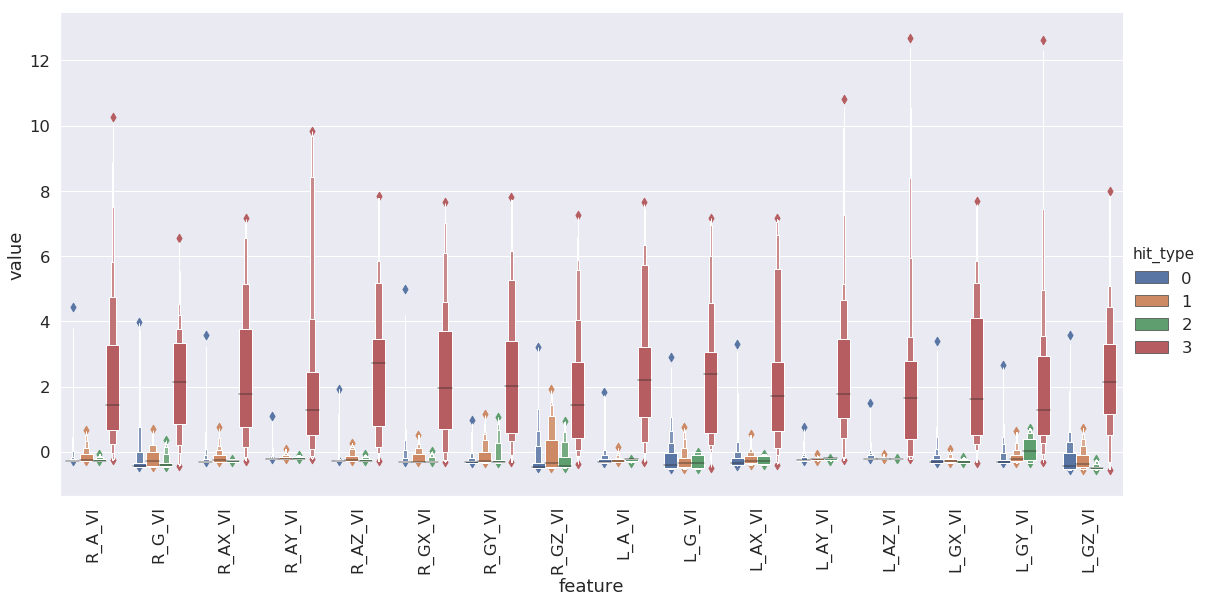

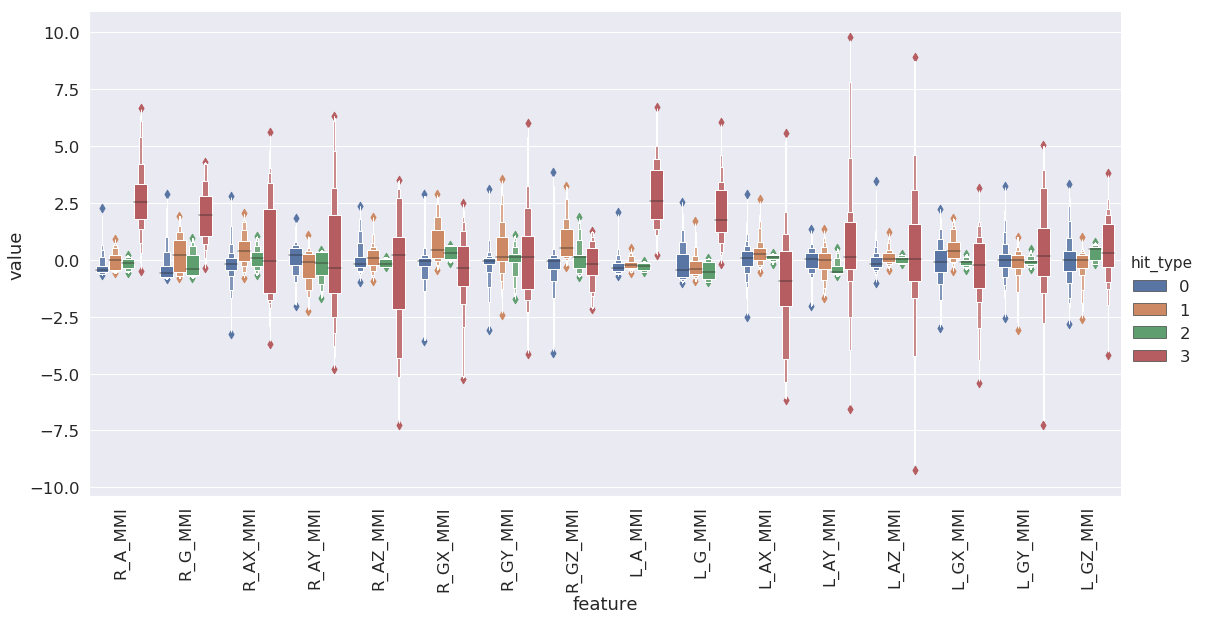

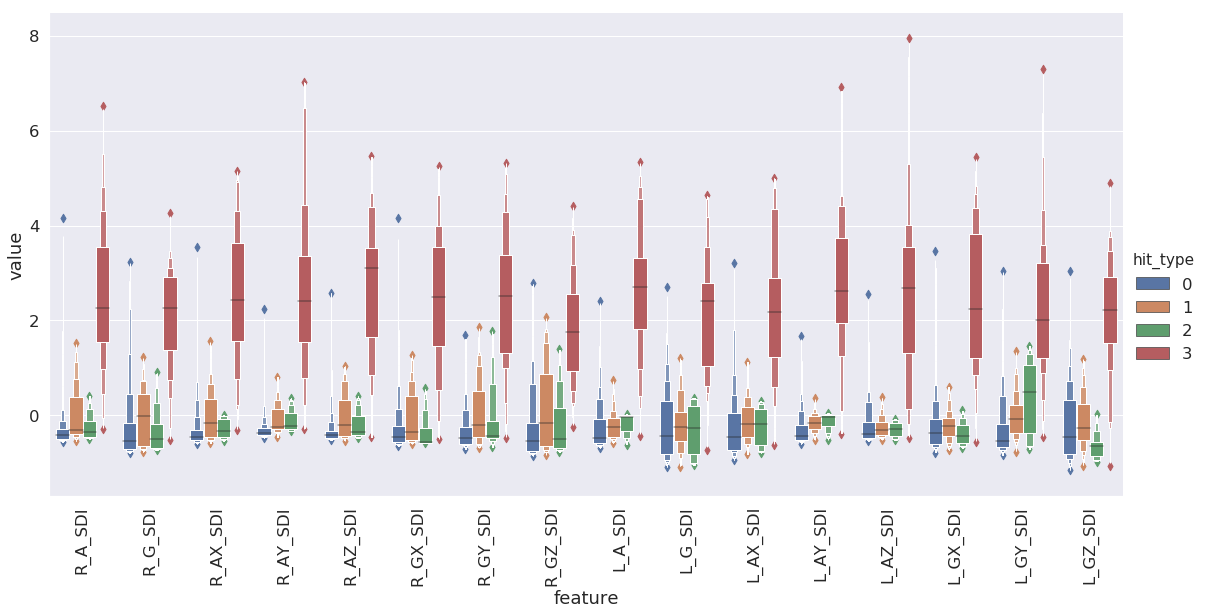

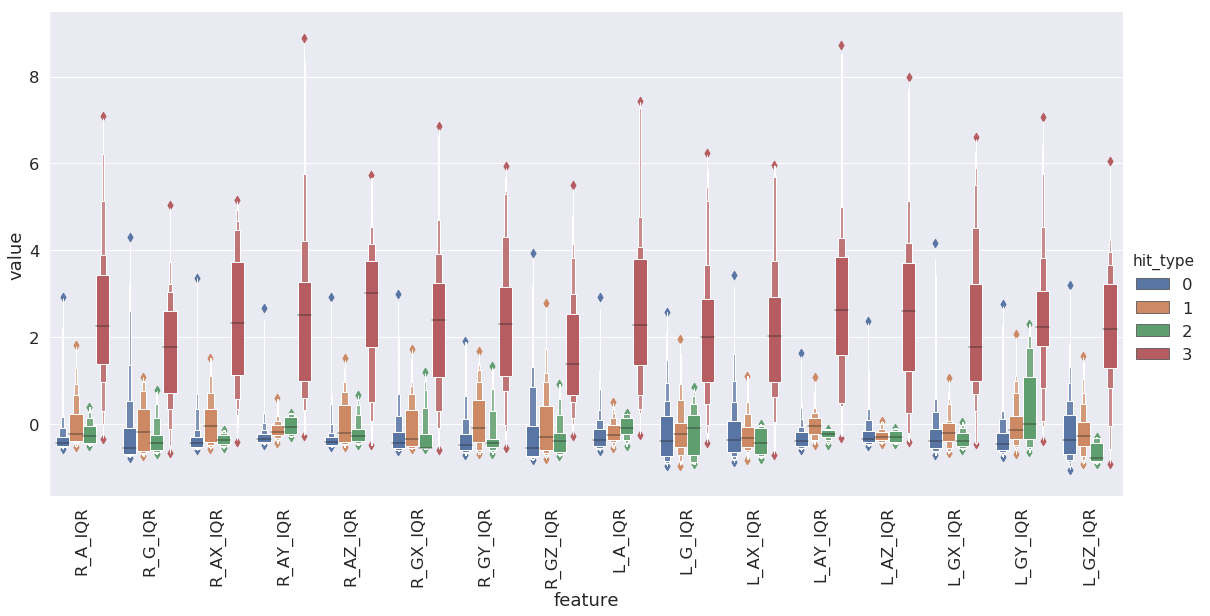

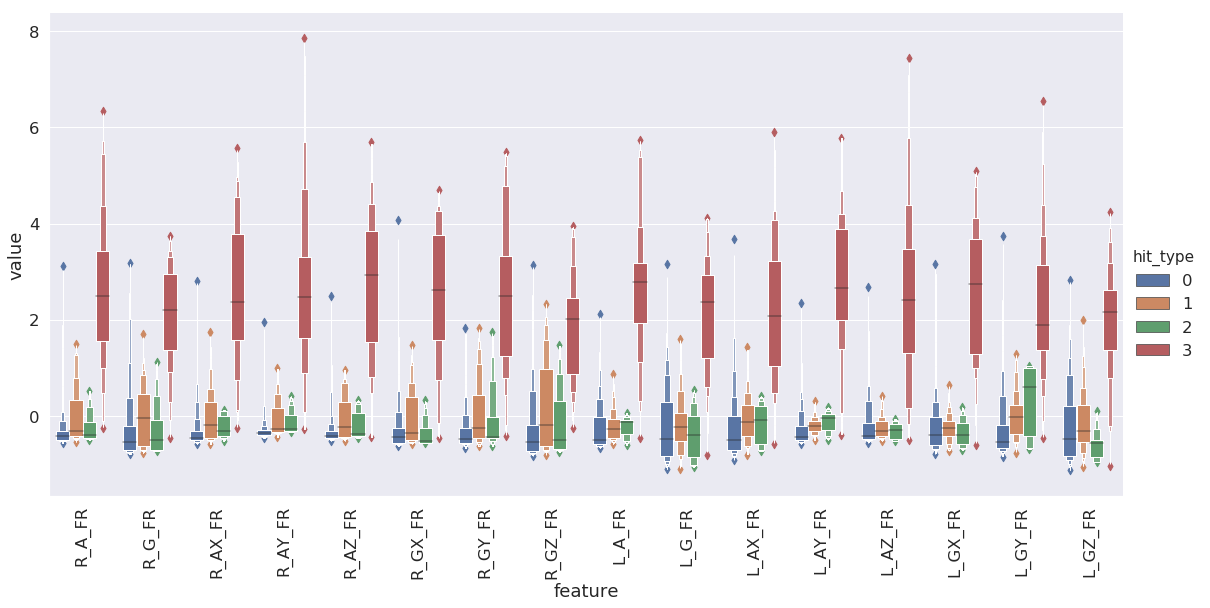

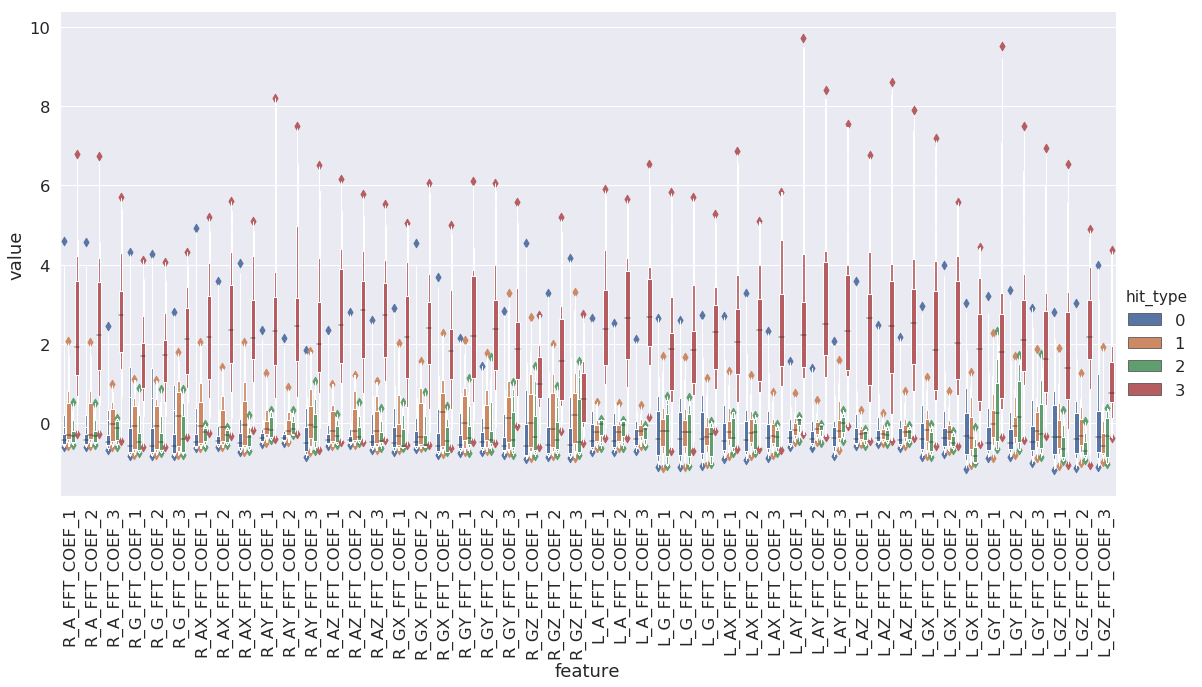

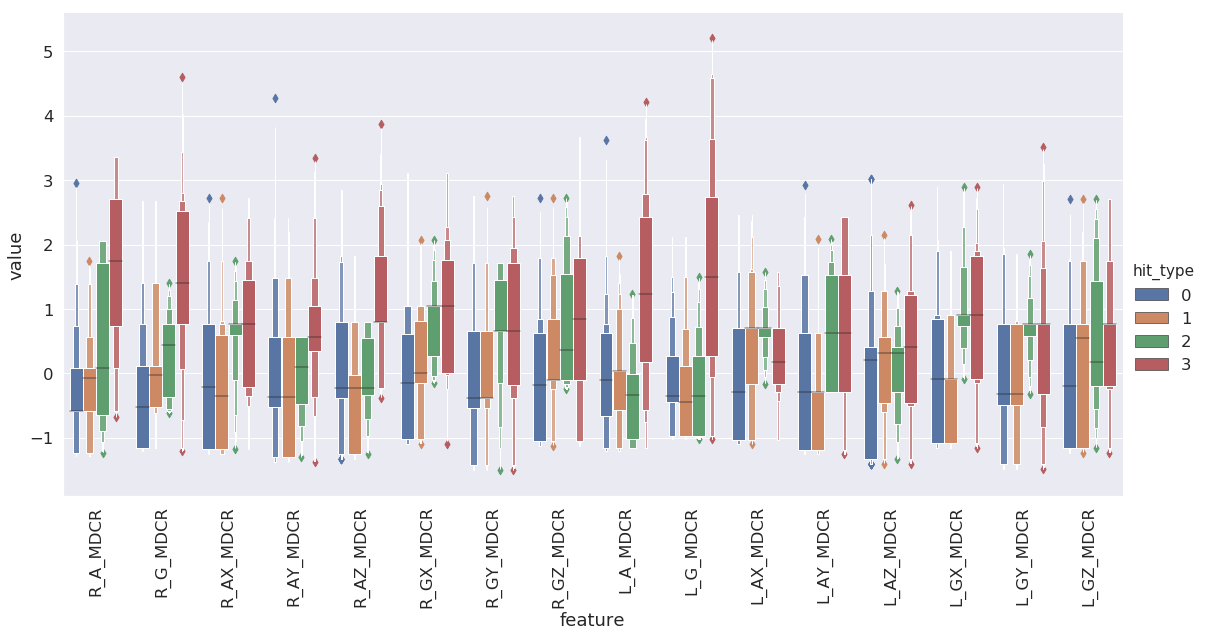

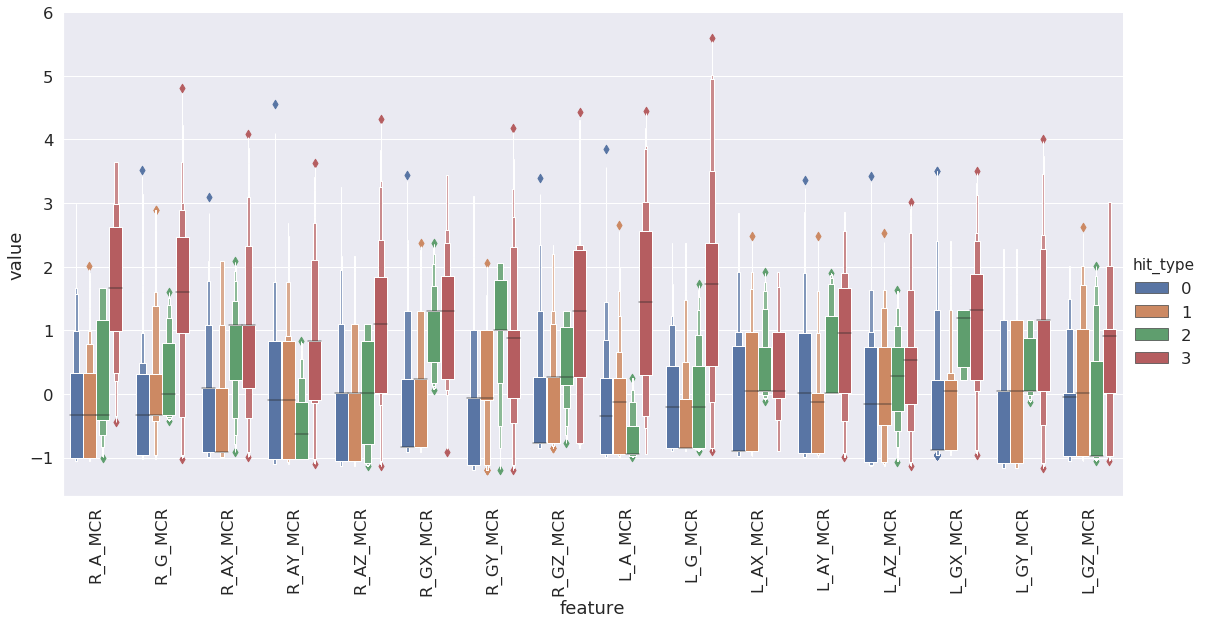

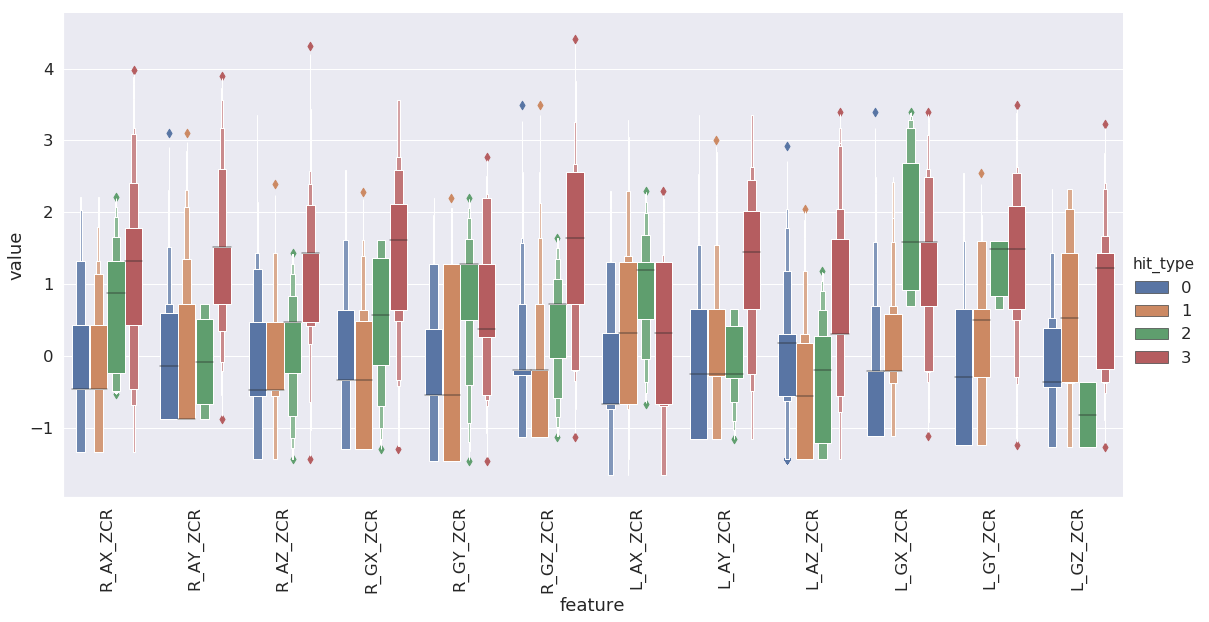

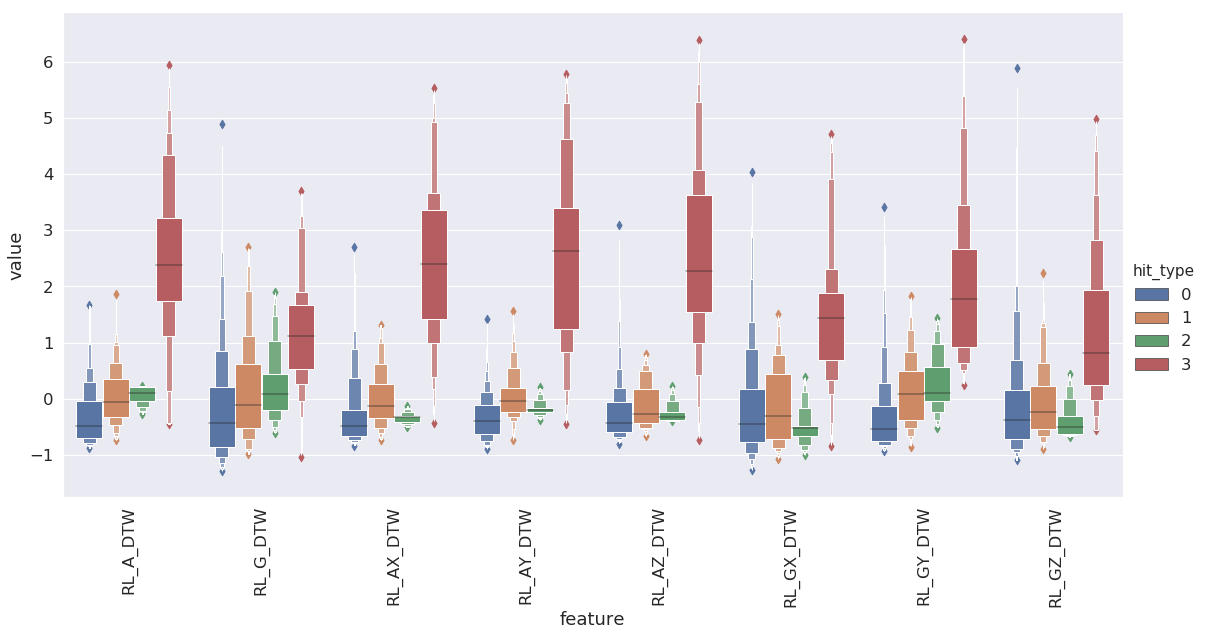

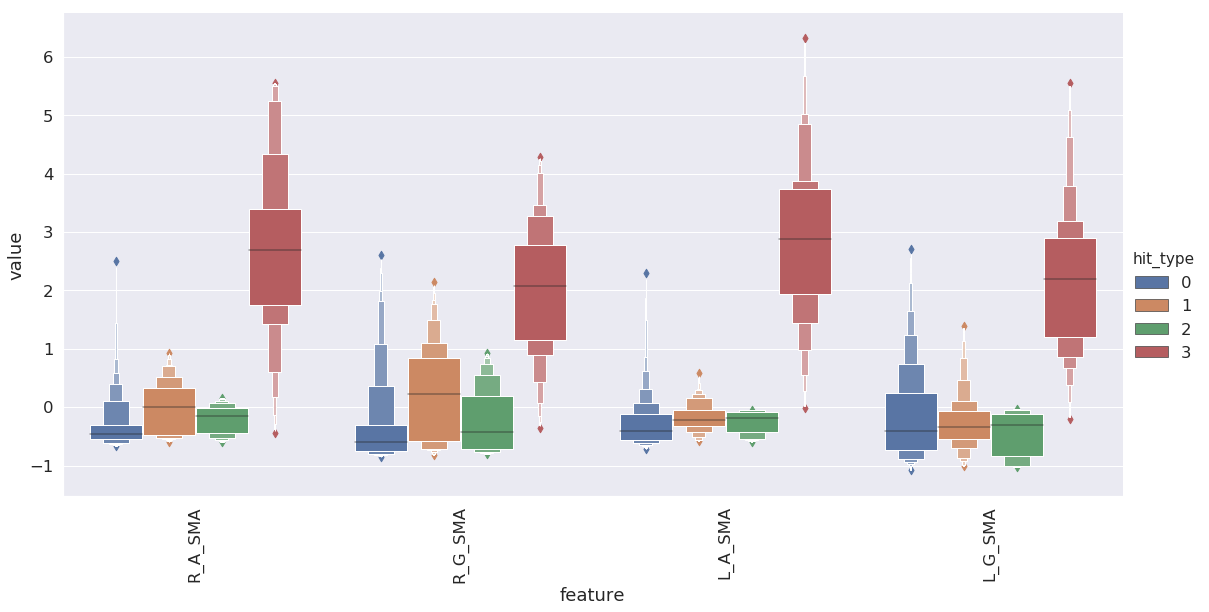

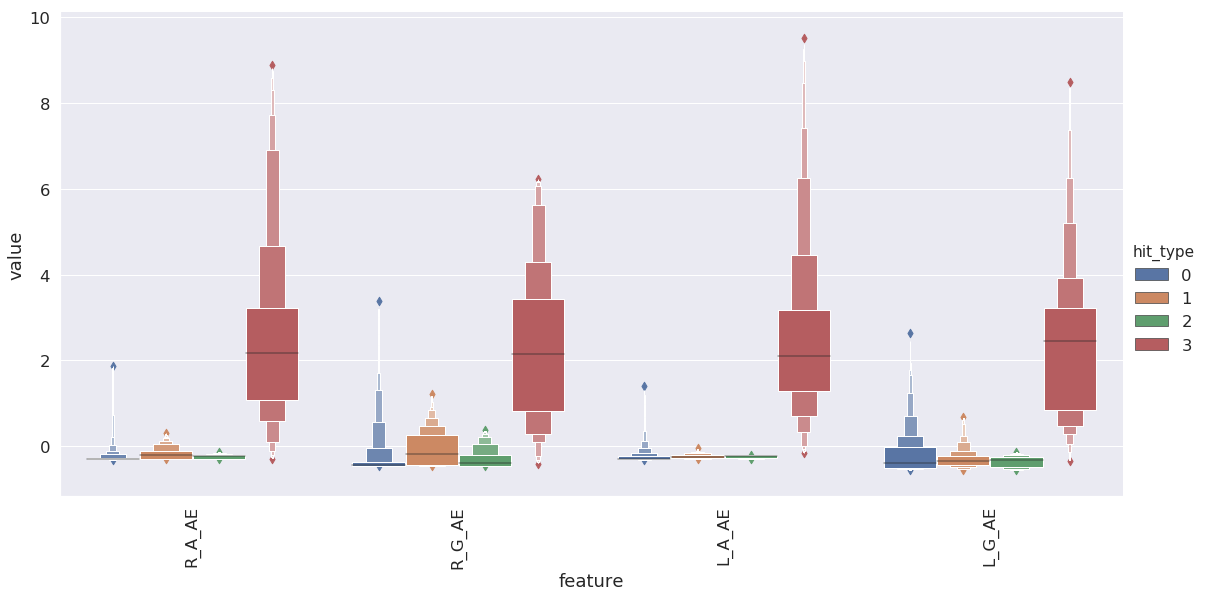

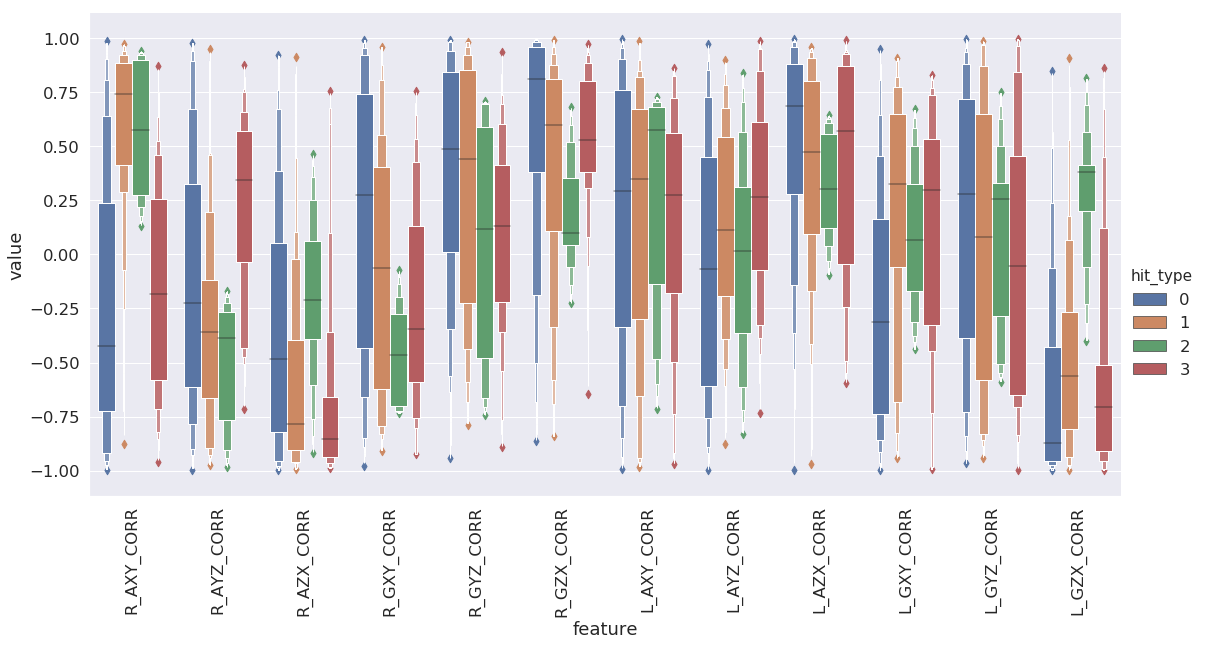

In [5]:
df = tk.get_event_primitive_df(WHO, SONG, ORDER, label_group='dong_ka')
plot_distribution(df)

## No scaling, Yes oversample

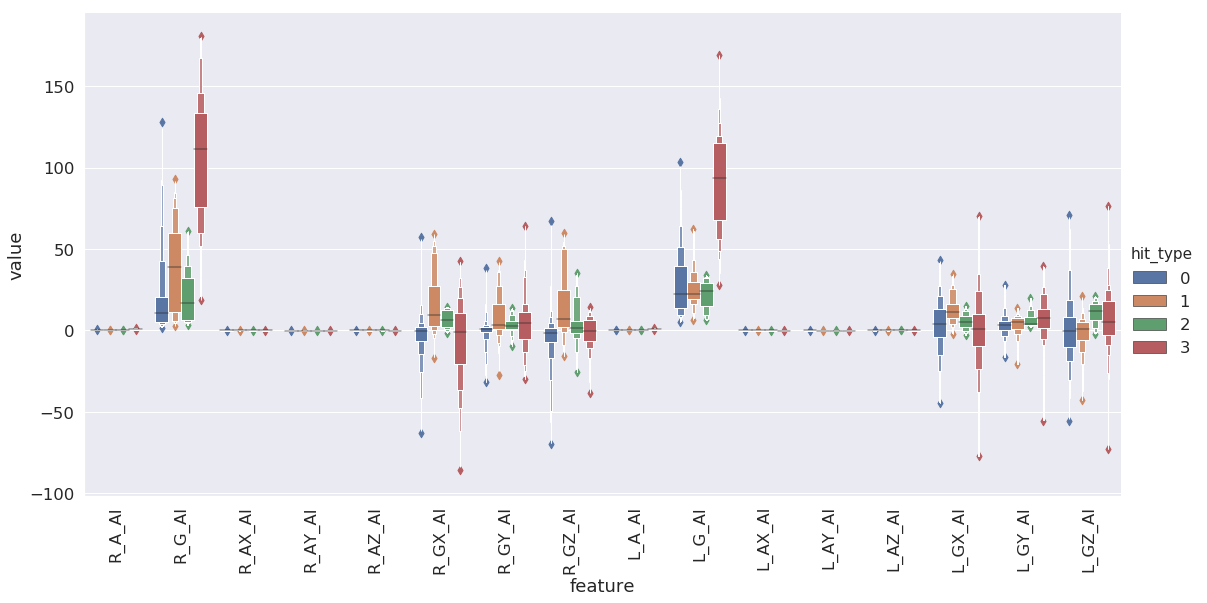

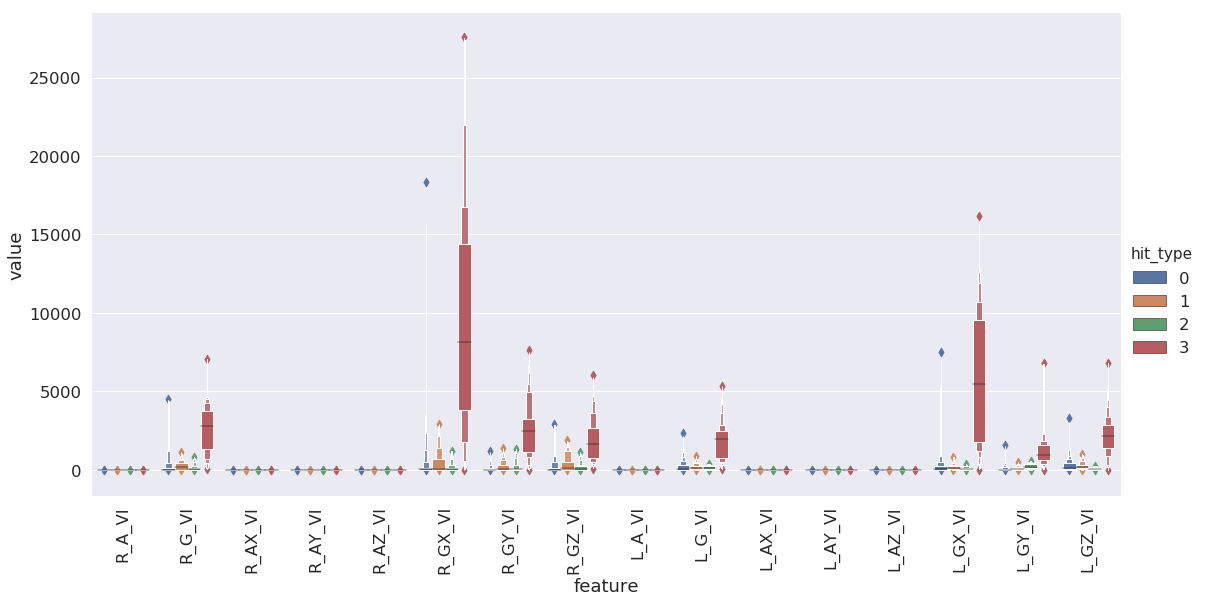

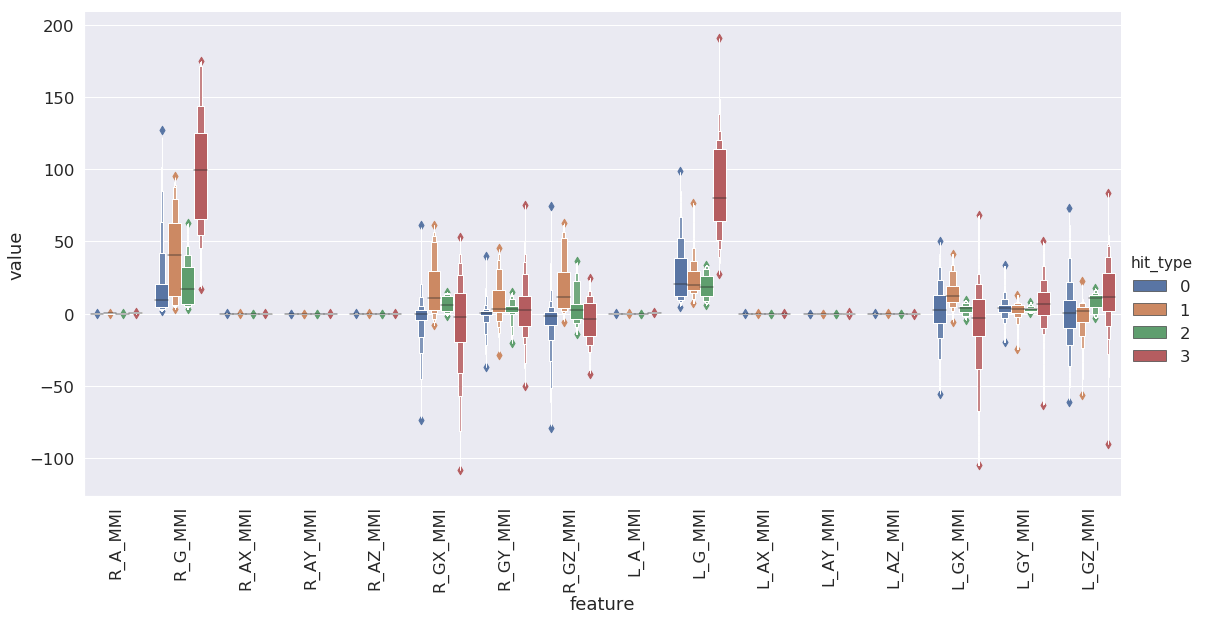

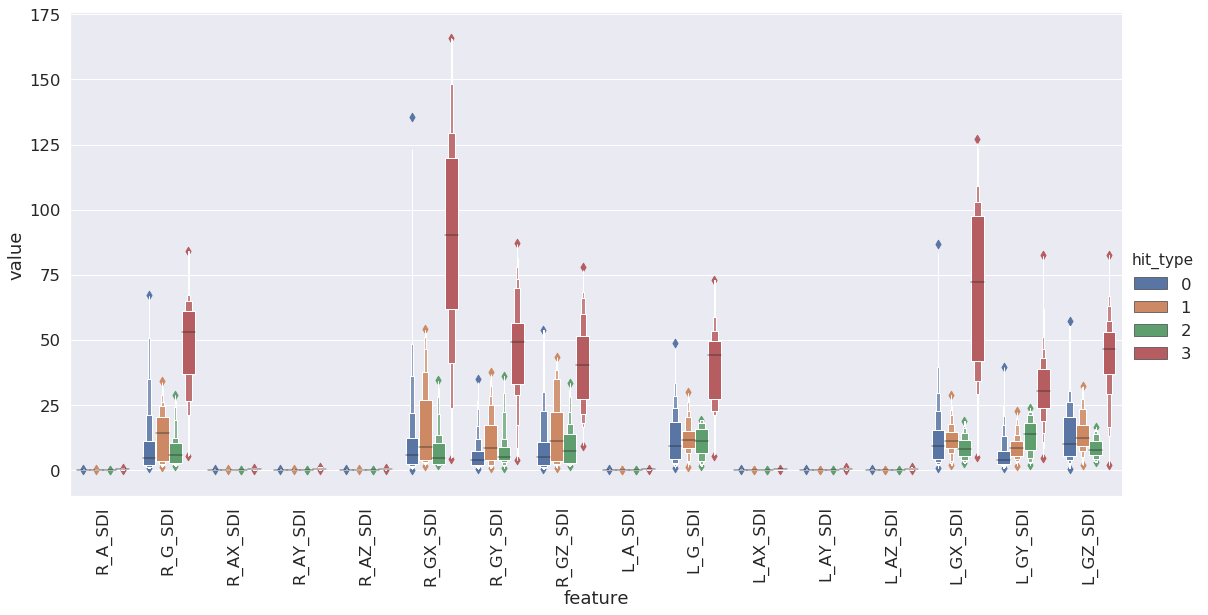

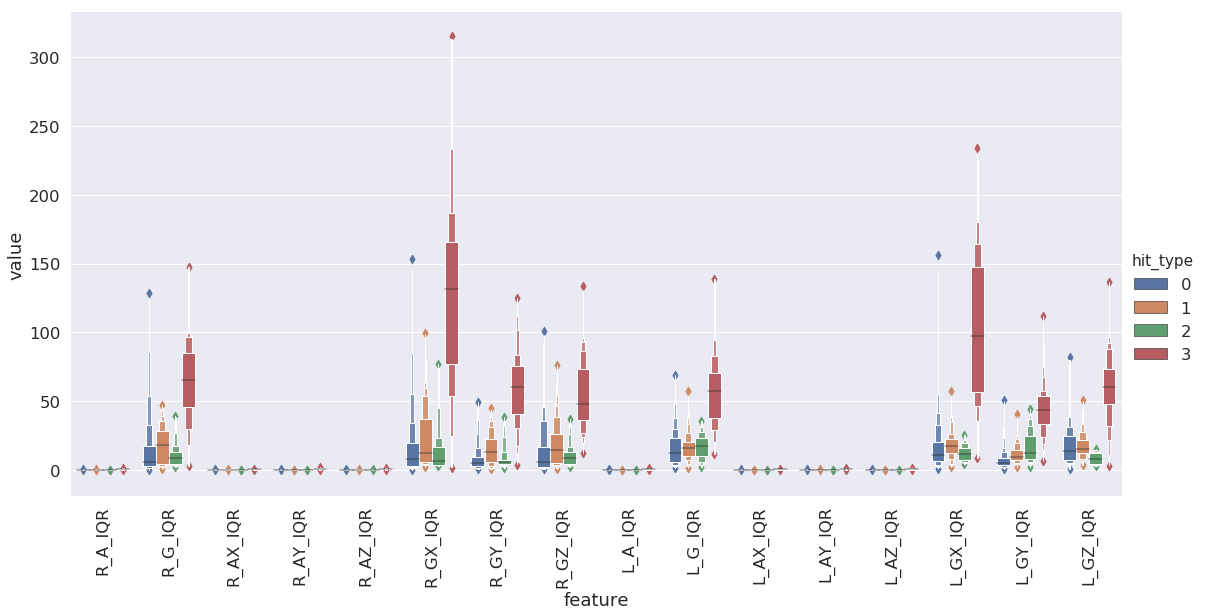

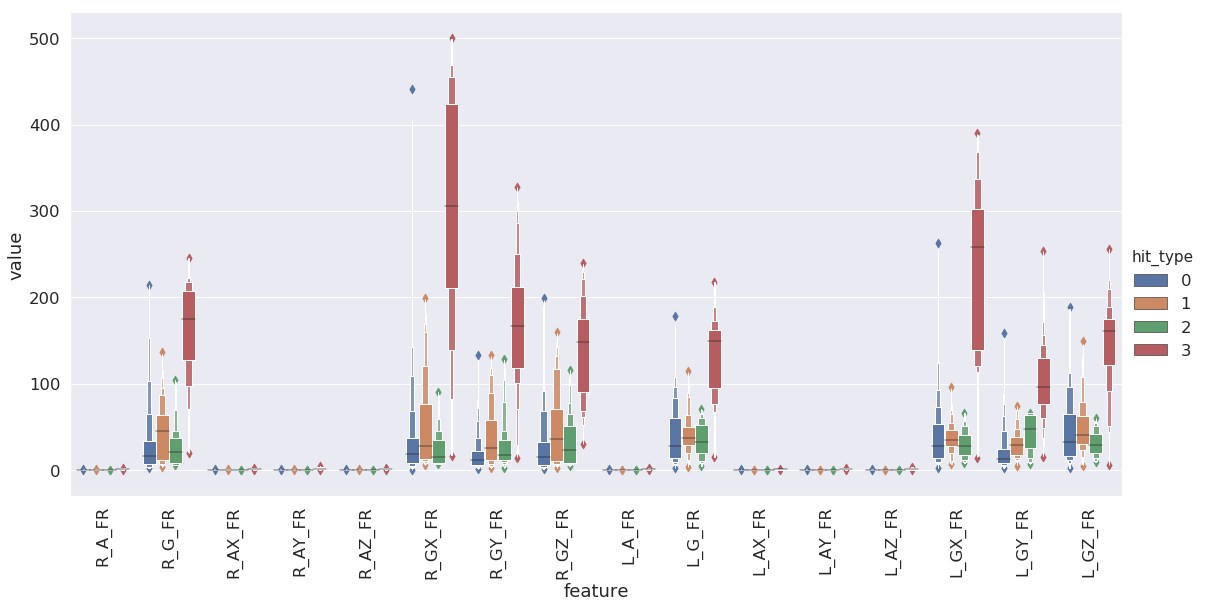

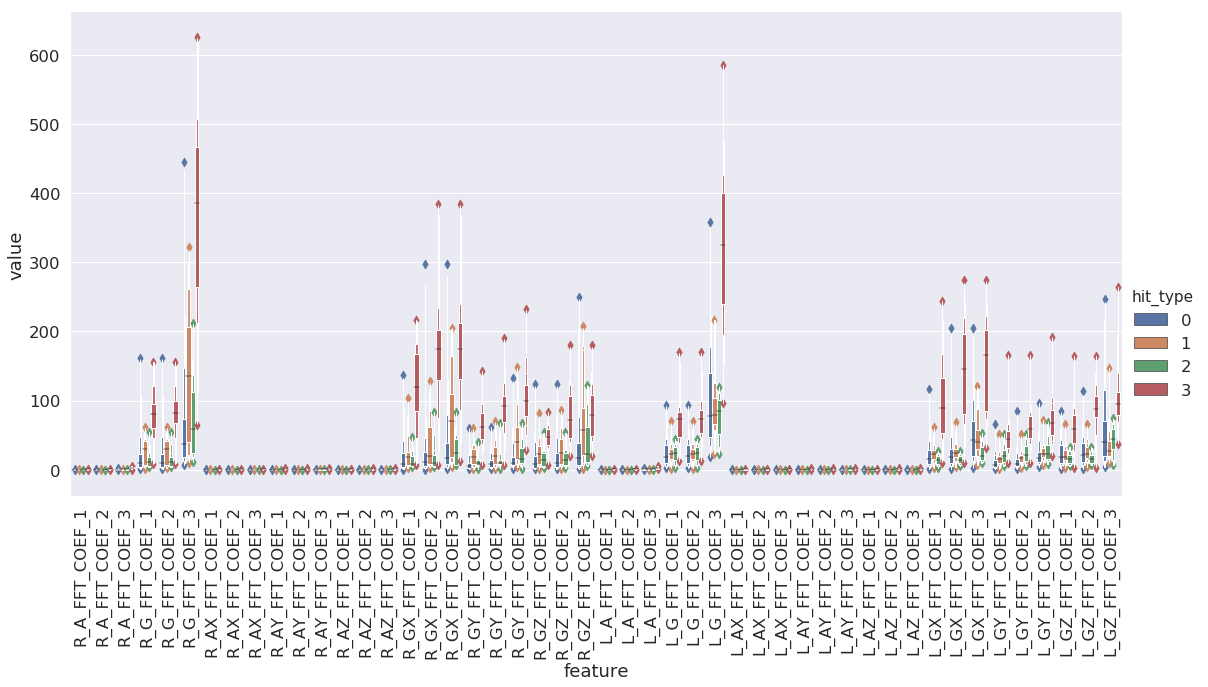

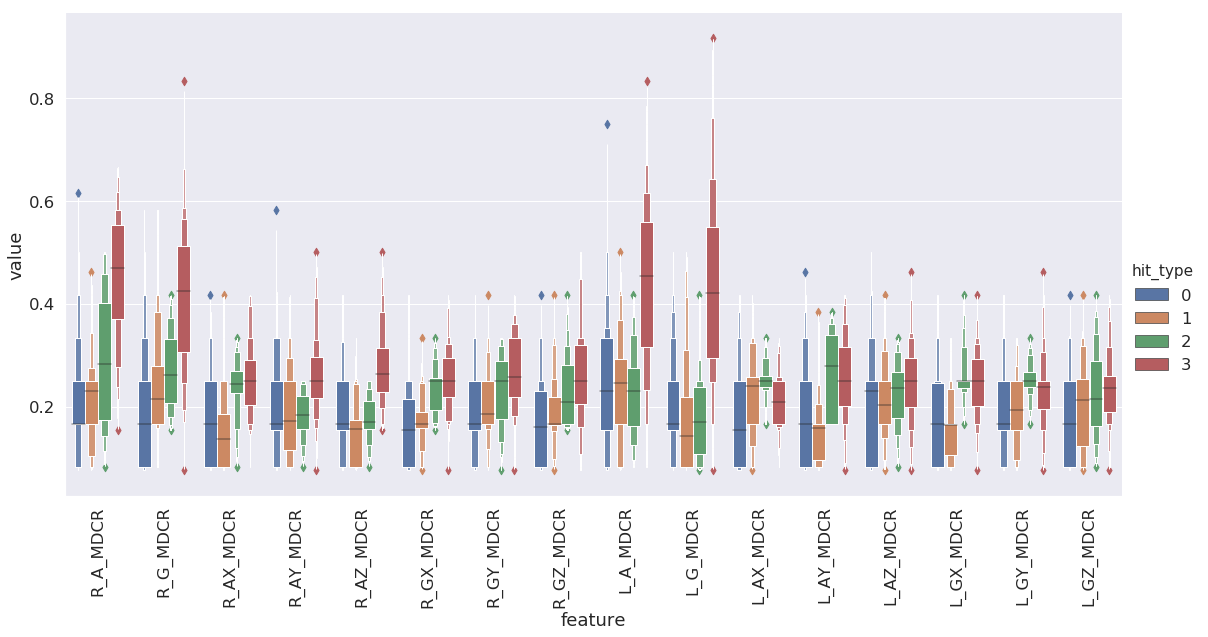

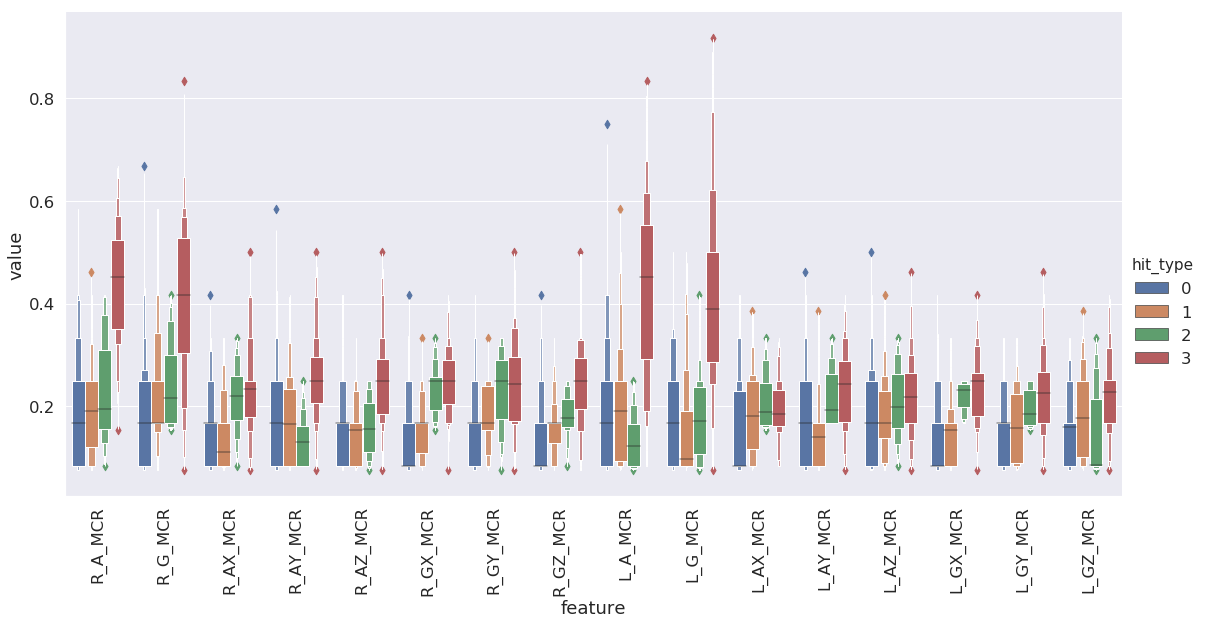

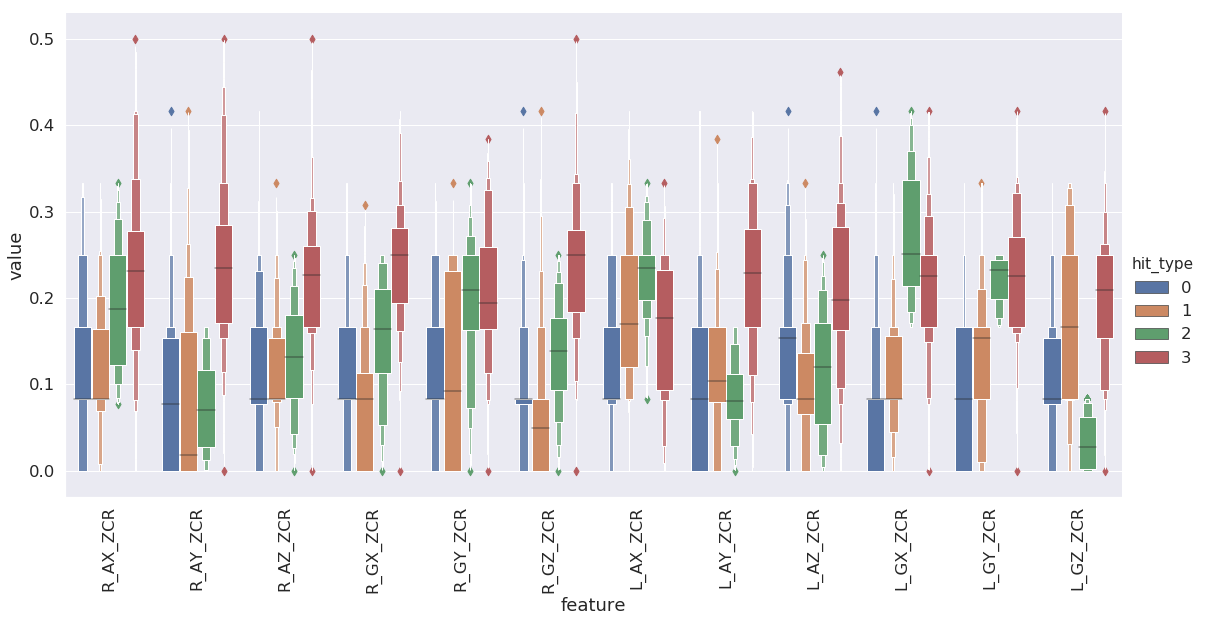

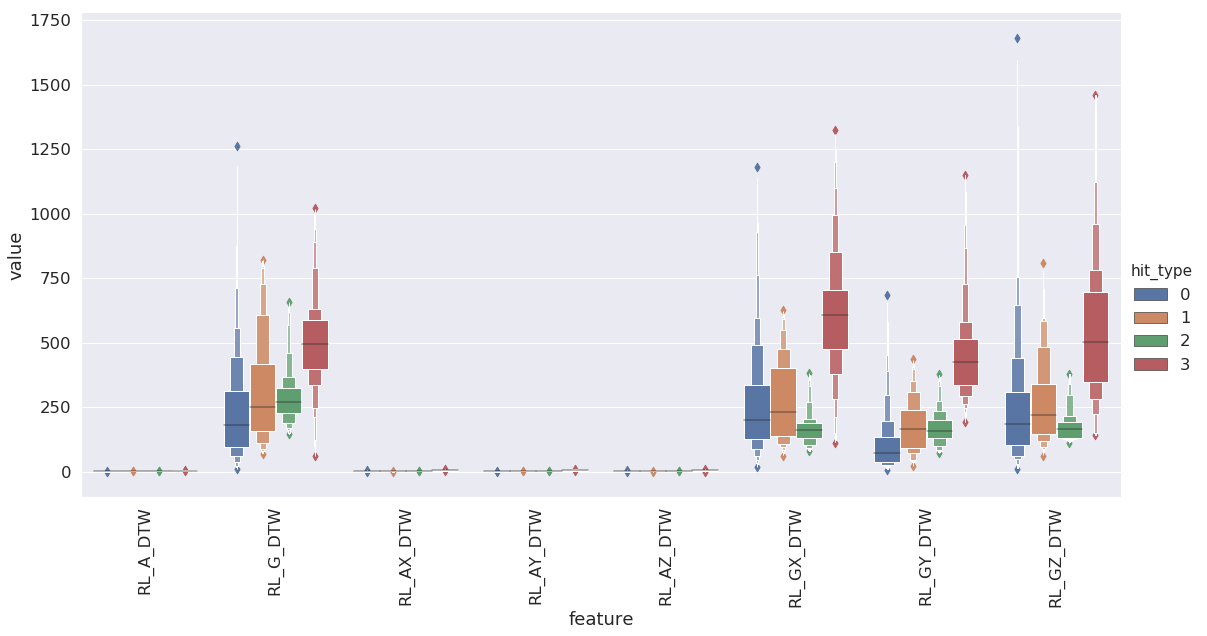

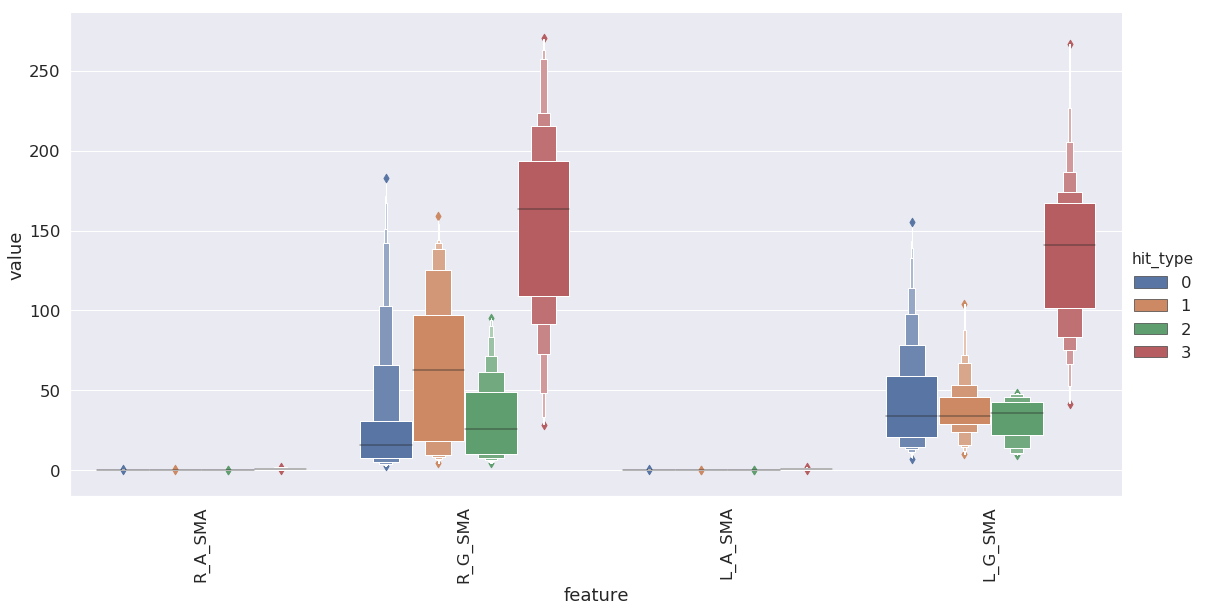

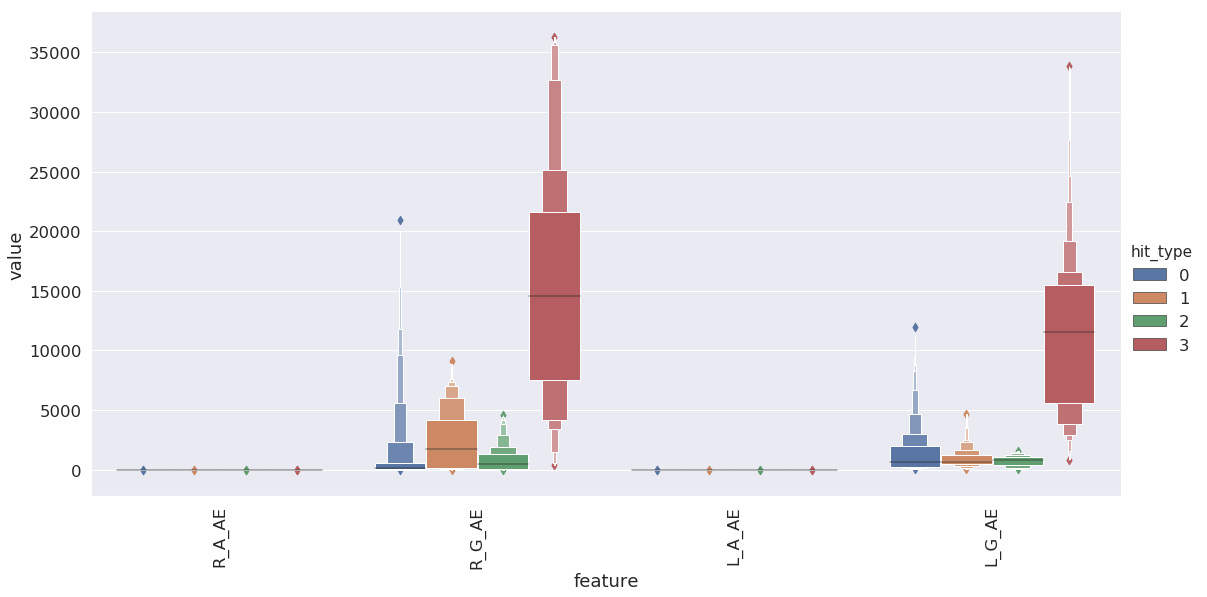

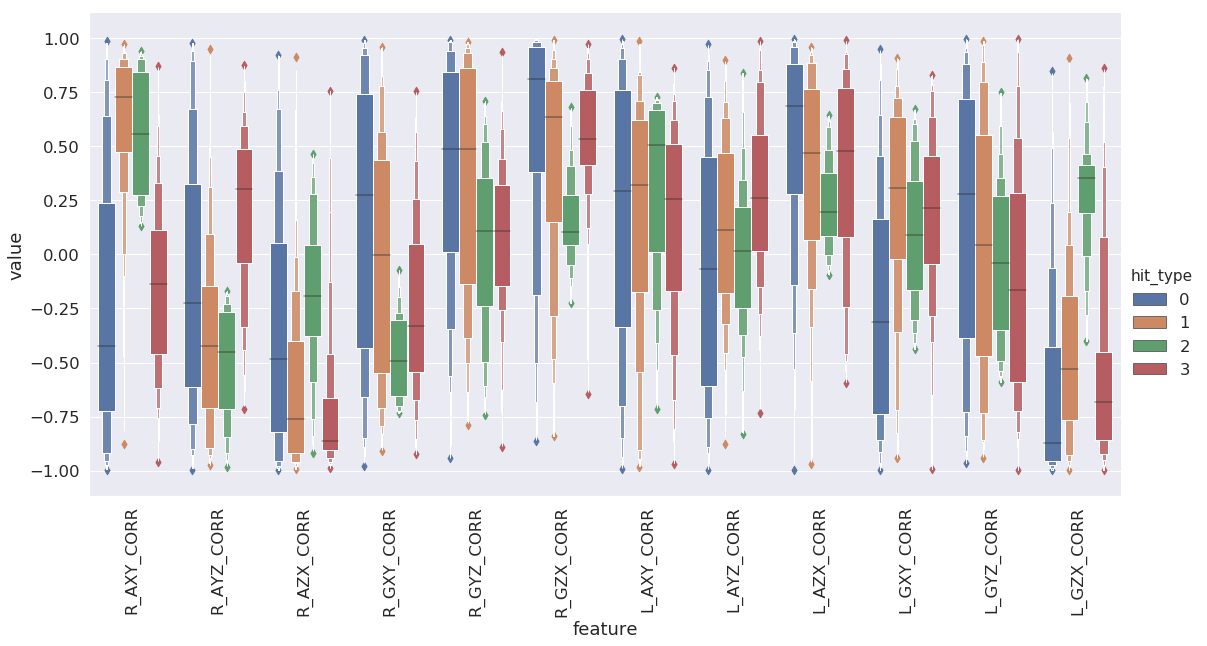

In [6]:
df = tk.get_event_primitive_df(WHO, SONG, ORDER, scaling=False, over_sampled=True, label_group='dong_ka')
plot_distribution(df)

## Yes scaling, Yes oversample

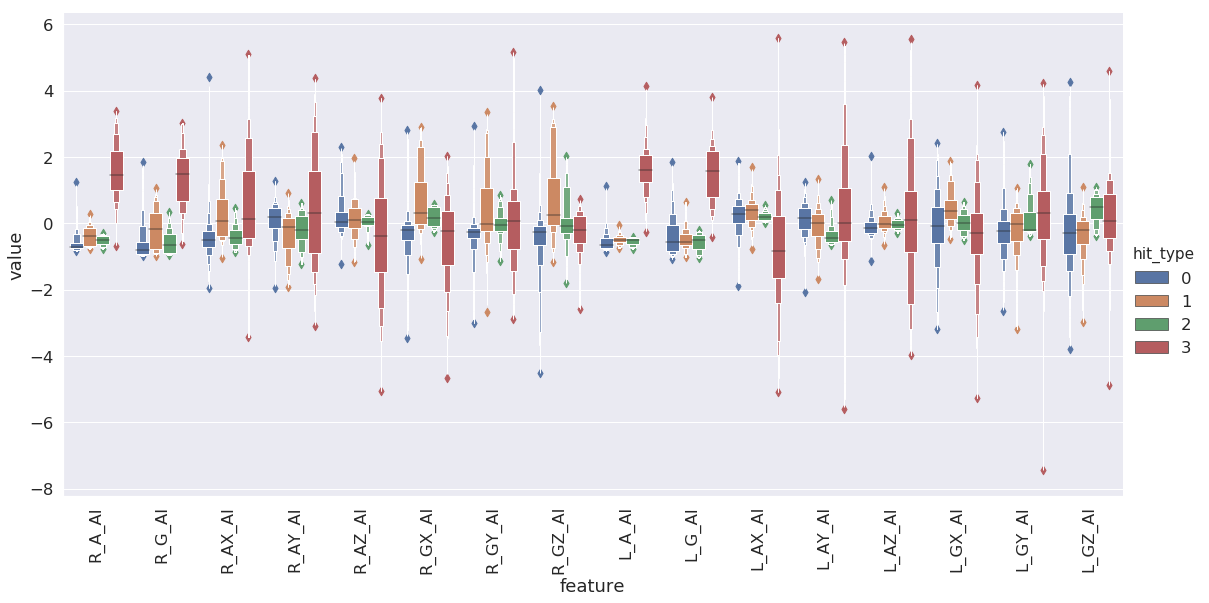

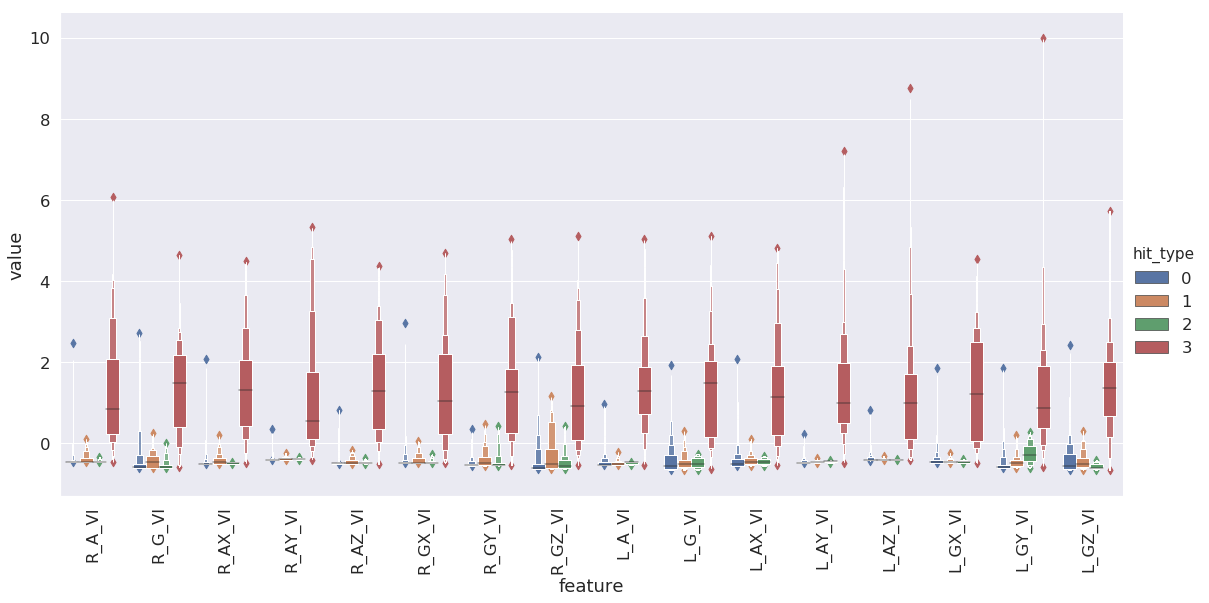

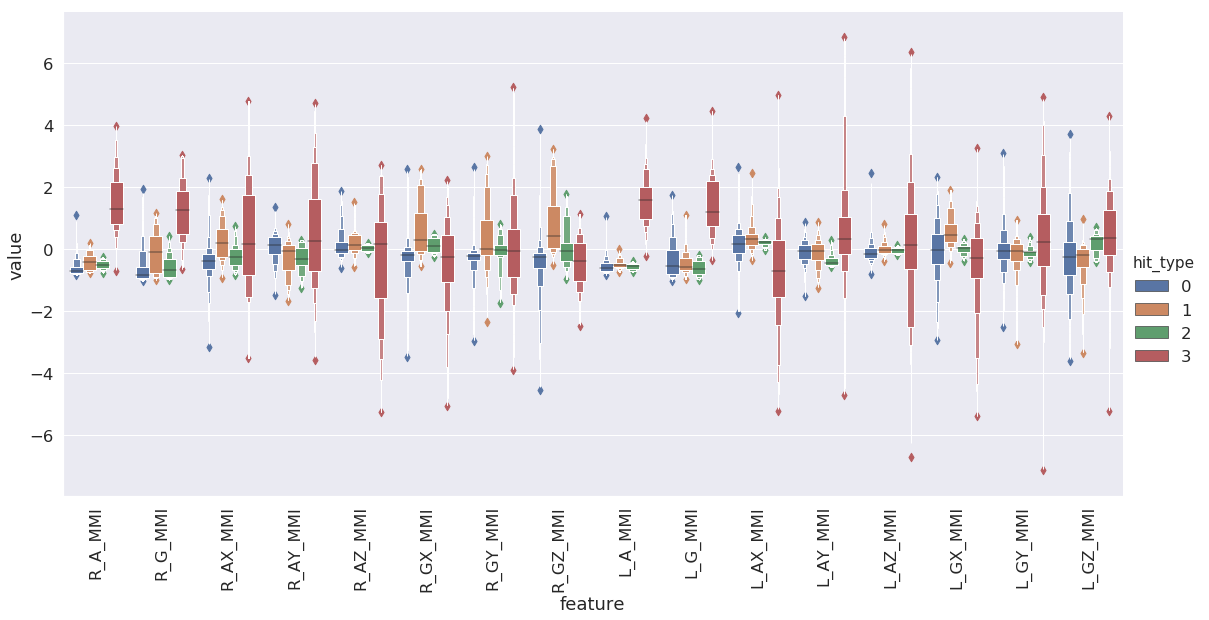

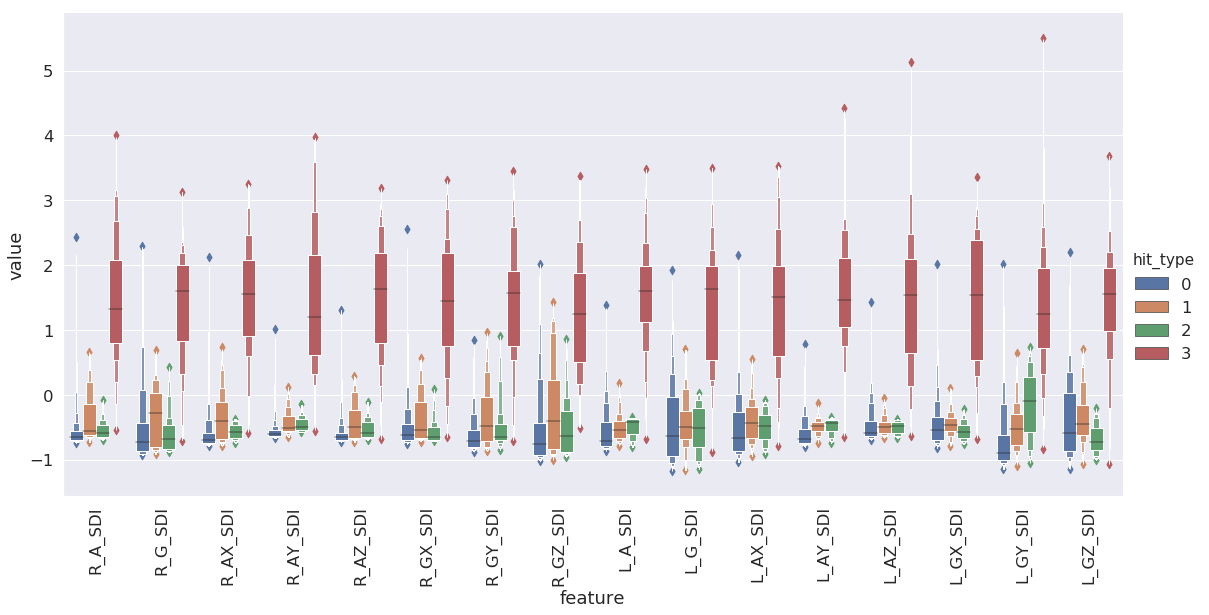

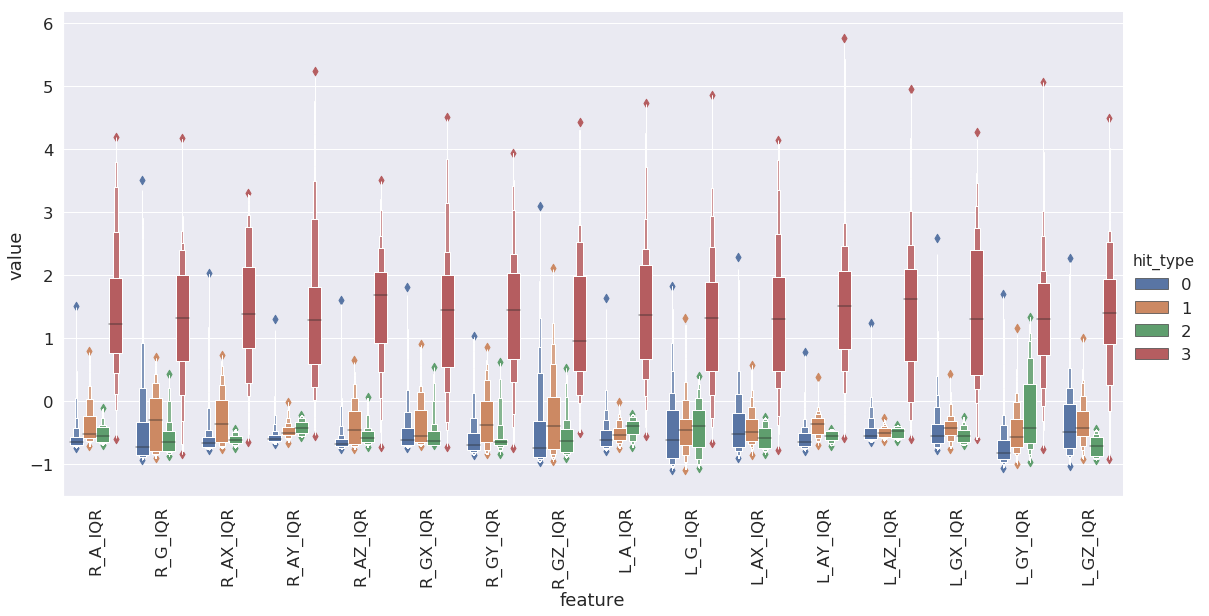

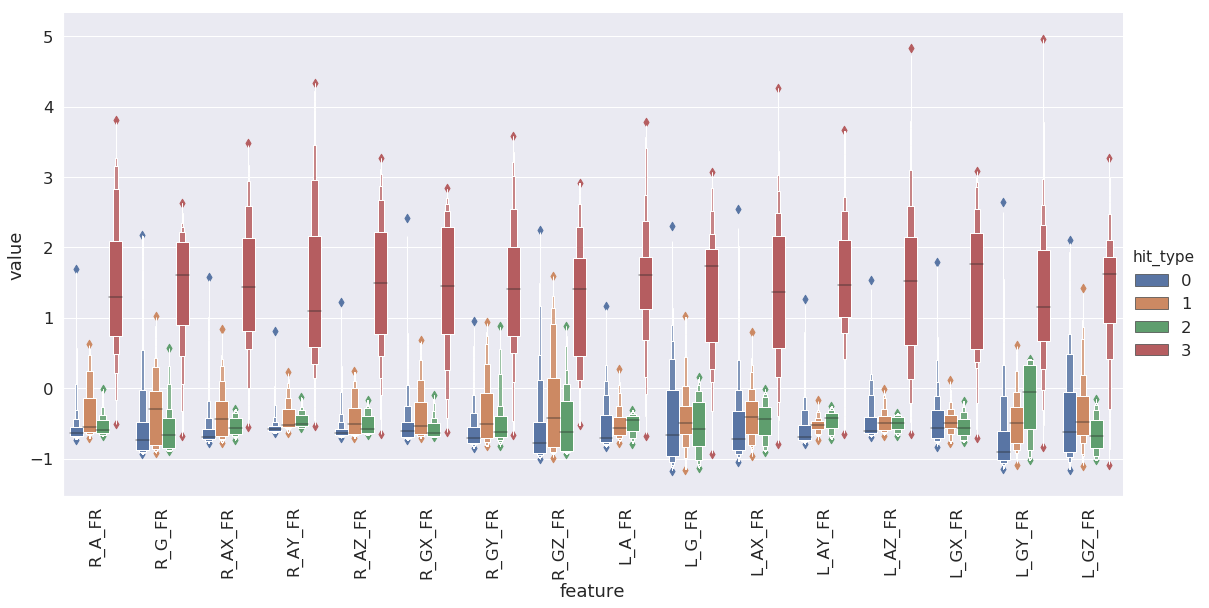

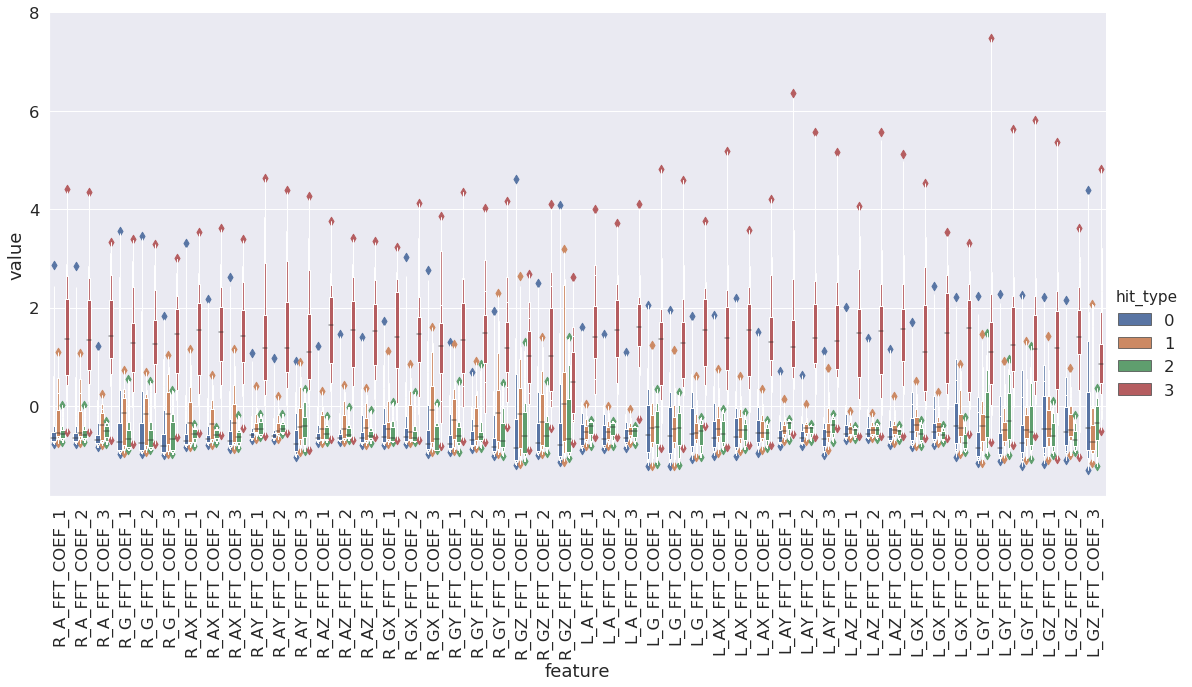

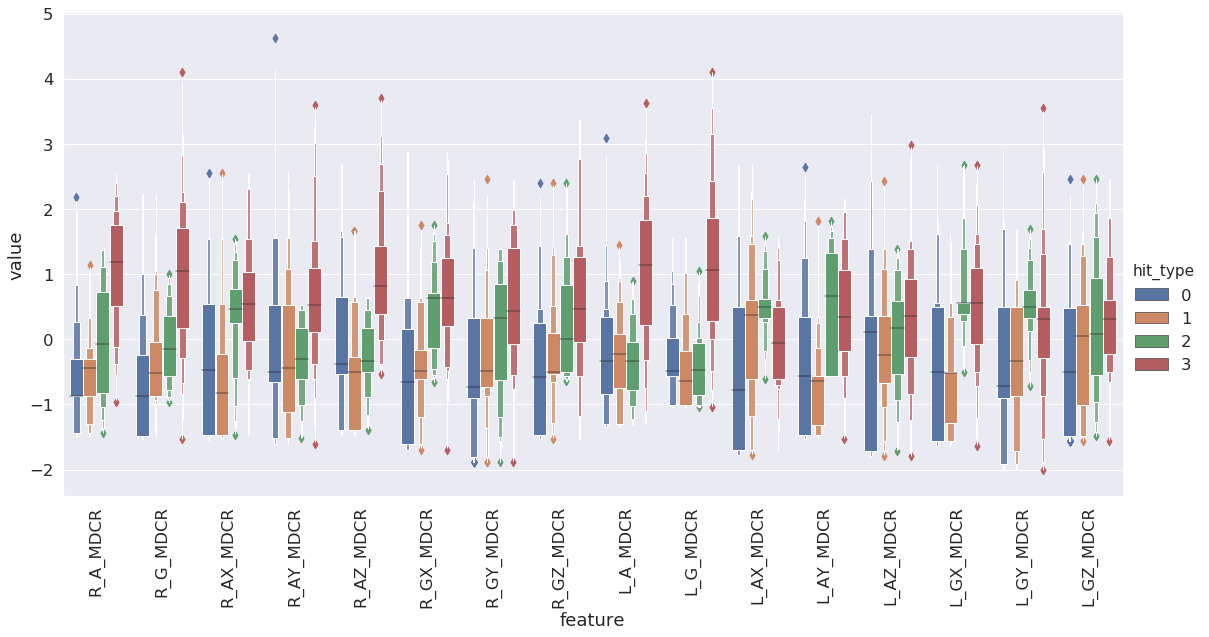

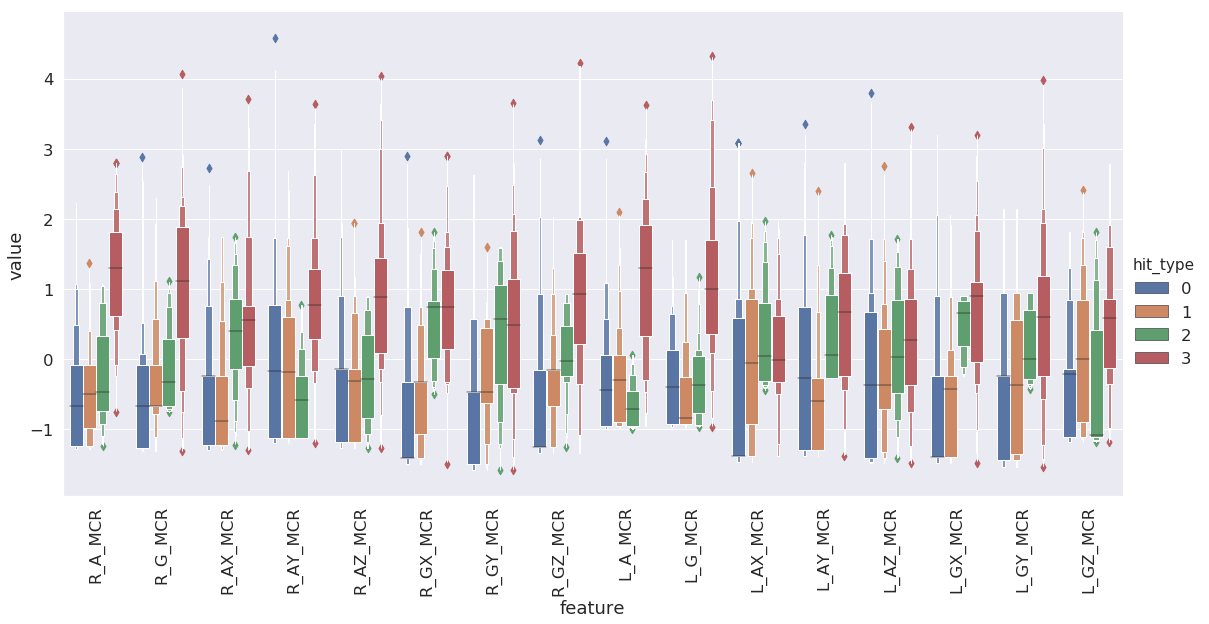

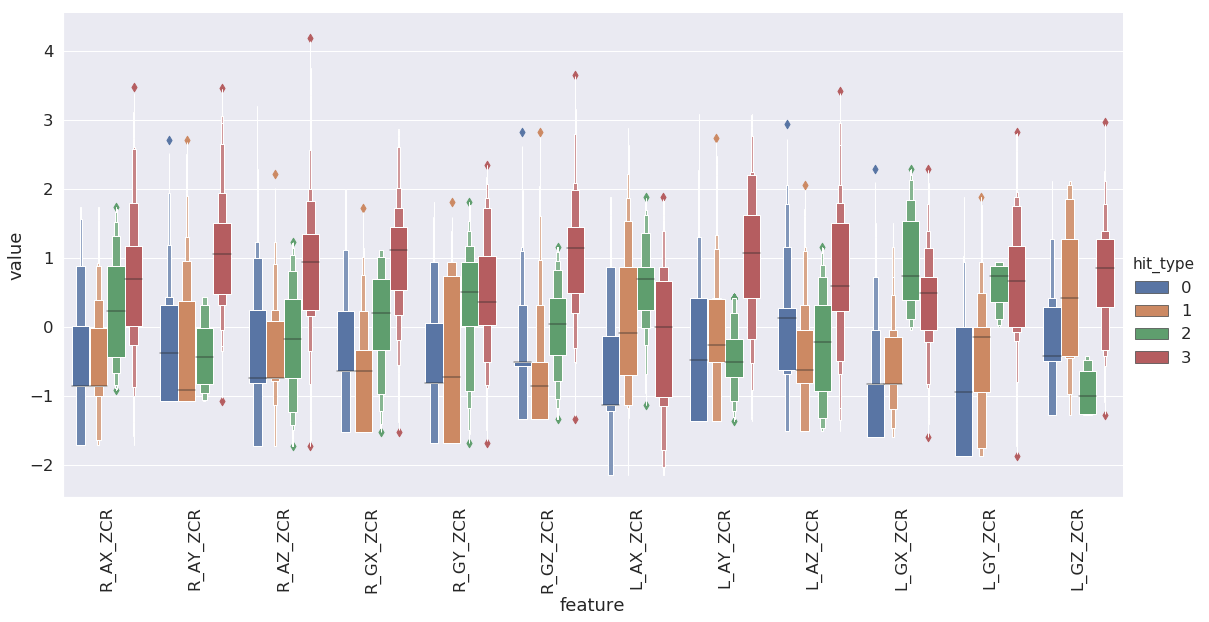

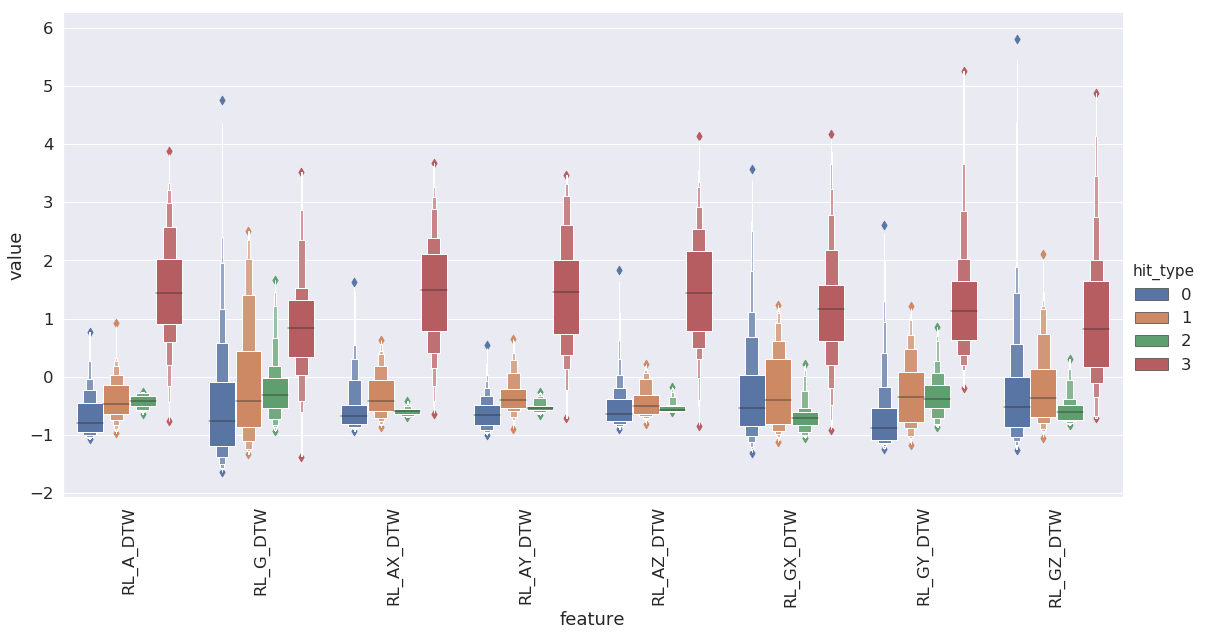

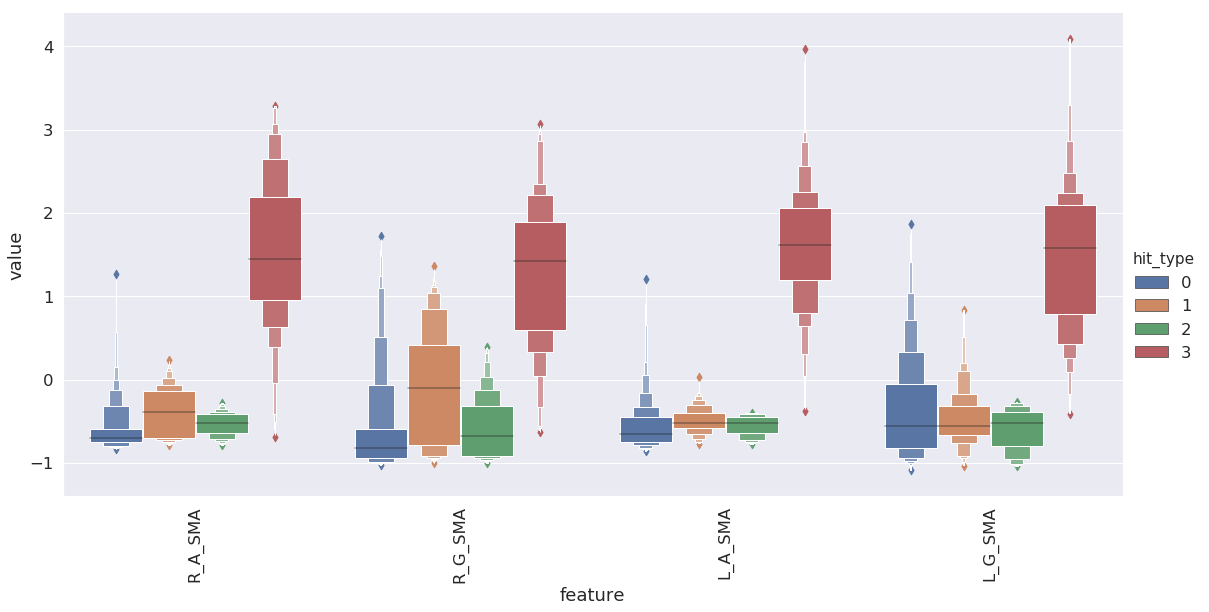

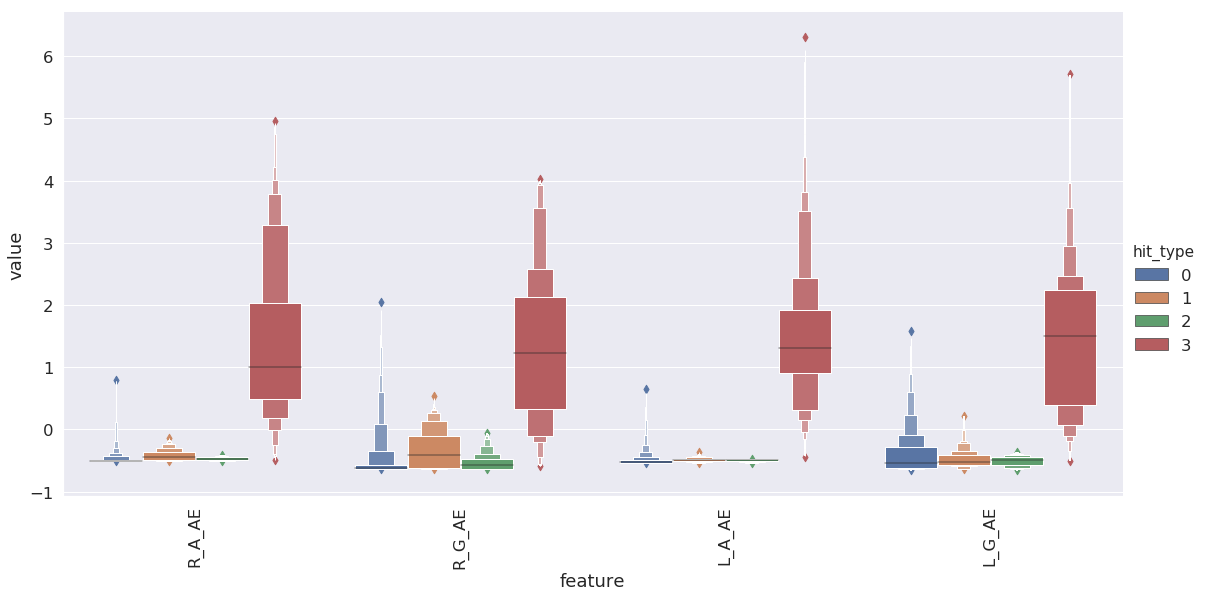

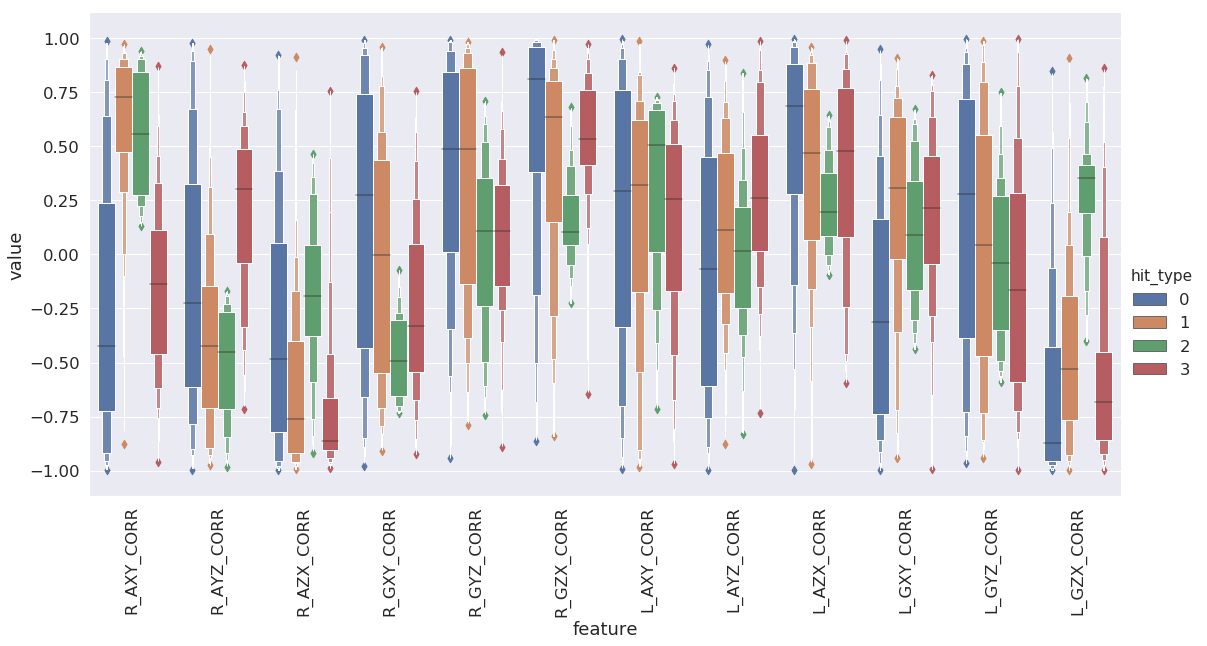

In [7]:
df = tk.get_event_primitive_df(WHO, SONG, ORDER, over_sampled=True, label_group='dong_ka')
plot_distribution(df)

# feature scatter

In [55]:
def plot_scatter(df):
    X = df.drop(['hit_type'], axis=1)
    y = df['hit_type']
    
    pca = PCA(n_components=2)
    xx = pca.fit_transform(X)
    vis_df = pd.DataFrame(data=xx, columns=['x1', 'x2'])
    vis_df['hit_type'] = y
    
    print(sorted(Counter(y).items()))
    
    plt.figure(figsize=(10, 10))
    sns.scatterplot(x='x1', y='x2', hue='hit_type', data=vis_df, style='hit_type', palette="Dark2")
    plt.xlabel('$x_1$')
    plt.ylabel('$x_2$')
    plt.xlim(-20, 50)
    plt.ylim(-20, 25)
    plt.show()    

## before oversample

[(0, 246), (1, 80), (2, 6), (3, 30)]


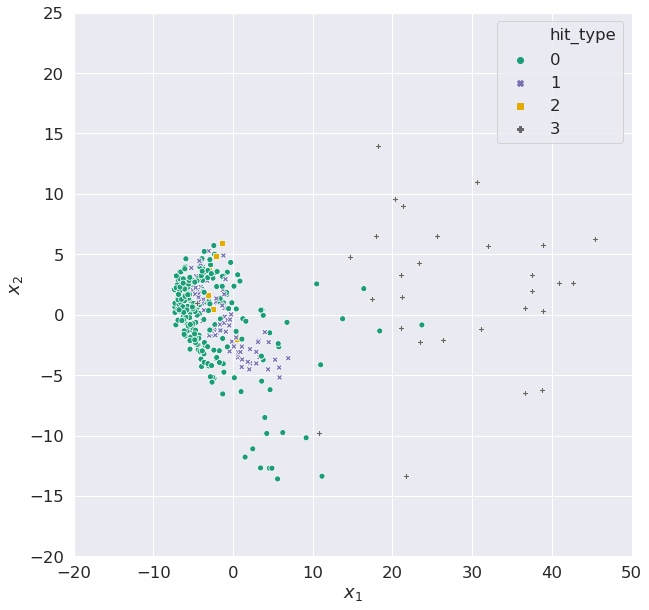

In [56]:
df = tk.get_event_primitive_df(WHO, SONG, ORDER, near=False, label_group='dong_ka')
plot_scatter(df)

## after oversample

[(0, 246), (1, 246), (2, 246), (3, 246)]


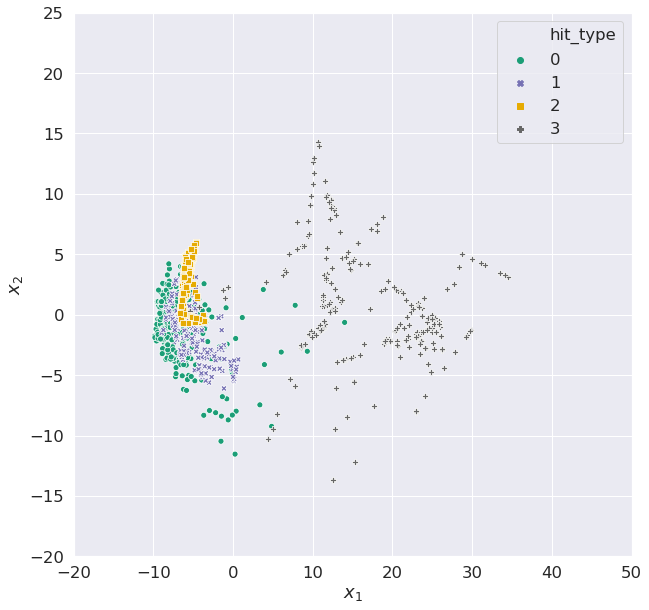

In [57]:
df = tk.get_event_primitive_df(WHO, SONG, ORDER, near=False, over_sampled=True, label_group='dong_ka')
plot_scatter(df)